## 1. Problem Statement

The healthcare industry plays a critical role in individual well-being. Due to rising medical costs, health insurance has become a necessity. Insurance providers face challenges in offering optimal policy pricing while minimizing risk. This project aims to build a predictive model that estimates the insurance cost for individuals based on their health and lifestyle attributes such as age, BMI, cholesterol level, exercise habits, smoking status, and more.

**Goal:** Predict optimum insurance cost using individual health and habit data.


## 2. Data Overview

We use `Data.csv`, which contains anonymized health data. Each row represents an individual insurance applicant.

- Target variable: `insurance_cost`
- Total rows & columns
- Variable types and descriptions


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!yes | unzip -o "/content/drive/MyDrive/Capstone Project /Healthcare capstone project 1/Health Care Project.zip" -d "/content/healthcare_data"


Archive:  /content/drive/MyDrive/Capstone Project /Healthcare capstone project 1/Health Care Project.zip
  inflating: /content/healthcare_data/Data.csv  
  inflating: /content/healthcare_data/Problem Statement.pdf  


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
sns.set(style='whitegrid')

In [ ]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)
print('Matplotlib Version',matplotlib.__version__)


Numpy Version 2.0.2
Pandas Version 2.2.2
Seaborn Version 0.13.2
Matplotlib Version 3.10.0


In [ ]:
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster

In [ ]:
import pandas as pd

df = pd.read_csv('/content/healthcare_data/Data.csv')



In [ ]:
#  Fix the typo in column name
df.rename(columns={"regular_checkup_lasy_year": "regular_checkup_last_year"}, inplace=True)


In [ ]:
df.head()

applicant_id  years_of_insurance_with_us  regular_checkup_last_year  \
0          5000                           3                          1   
1          5001                           0                          0   
2          5002                           1                          0   
3          5003                           7                          4   
4          5004                           3                          1   

   adventure_sports Occupation  visited_doctor_last_1_year cholesterol_level  \
0                 1    Salried                           2        125 to 150   
1                 0    Student                           4        150 to 175   
2                 0   Business                           4        200 to 225   
3                 0   Business                           2        175 to 200   
4                 0    Student                           2        150 to 175   

   daily_avg_steps  age  heart_decs_history  ...   smoking_status  \
0             4866   28                   1  ...          Unknown   
1             6411   50                   0  ...  formerly smoked   
2             4509   68                   0  ...  formerly smoked   
3             6214   51                   0  ...          Unknown   
4             4938   44                   0  ...     never smoked   

  Year_last_admitted   Location  weight covered_by_any_other_company  Alcohol  \
0                NaN    Chennai      67                            N     Rare   
1                NaN     Jaipur      58                            N     Rare   
2                NaN     Jaipur      73                            N    Daily   
3                NaN    Chennai      71                            Y     Rare   
4             2004.0  Bangalore      74                            N       No   

   exercise  weight_change_in_last_one_year fat_percentage insurance_cost  
0  Moderate                               1             25          20978  
1  Moderate                               3             27           6170  
2   Extreme                               0             32          28382  
3        No                               3             37          27148  
4   Extreme                               0             34          29616  

[5 rows x 24 columns]

In [ ]:
df.tail()


applicant_id  years_of_insurance_with_us  regular_checkup_last_year  \
24995         29995                           3                          0   
24996         29996                           6                          0   
24997         29997                           7                          0   
24998         29998                           1                          0   
24999         29999                           8                          2   

       adventure_sports Occupation  visited_doctor_last_1_year  \
24995                 0    Salried                           4   
24996                 0   Business                           4   
24997                 1    Student                           2   
24998                 0    Salried                           2   
24999                 0   Business                           4   

      cholesterol_level  daily_avg_steps  age  heart_decs_history  ...  \
24995        225 to 250             5614   22                   0  ...   
24996        200 to 225             4719   58                   0  ...   
24997        150 to 175             5624   34                   0  ...   
24998        225 to 250            10777   27                   0  ...   
24999        150 to 175             5882   22                   1  ...   

        smoking_status Year_last_admitted     Location  weight  \
24995           smokes             2000.0       Kanpur      79   
24996     never smoked             2009.0       Kanpur      66   
24997          Unknown                NaN  Bhubaneswar      76   
24998          Unknown                NaN        Surat      74   
24999  formerly smoked             2014.0      Chennai      57   

      covered_by_any_other_company  Alcohol  exercise  \
24995                            Y     Rare  Moderate   
24996                            N     Rare  Moderate   
24997                            N     Rare  Moderate   
24998                            N     Rare  Moderate   
24999                            N       No        No   

       weight_change_in_last_one_year fat_percentage insurance_cost  
24995                               4             40          39488  
24996                               2             28          14808  
24997                               1             35          33318  
24998                               0             40          30850  
24999                               4             21           6170  

[5 rows x 24 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_last_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

In [ ]:
df.describe()

applicant_id  years_of_insurance_with_us  regular_checkup_last_year  \
count  25000.000000                25000.000000               25000.000000   
mean   17499.500000                    4.089040                   0.773680   
std     7217.022701                    2.606612                   1.199449   
min     5000.000000                    0.000000                   0.000000   
25%    11249.750000                    2.000000                   0.000000   
50%    17499.500000                    4.000000                   0.000000   
75%    23749.250000                    6.000000                   1.000000   
max    29999.000000                    8.000000                   5.000000   

       adventure_sports  visited_doctor_last_1_year  daily_avg_steps  \
count      25000.000000                25000.000000     25000.000000   
mean           0.081720                    3.104200      5215.889320   
std            0.273943                    1.141663      1053.179748   
min            0.000000                    0.000000      2034.000000   
25%            0.000000                    2.000000      4543.000000   
50%            0.000000                    3.000000      5089.000000   
75%            0.000000                    4.000000      5730.000000   
max            1.000000                   12.000000     11255.000000   

                age  heart_decs_history  other_major_decs_history  \
count  25000.000000        25000.000000              25000.000000   
mean      44.918320            0.054640                  0.098160   
std       16.107492            0.227281                  0.297537   
min       16.000000            0.000000                  0.000000   
25%       31.000000            0.000000                  0.000000   
50%       45.000000            0.000000                  0.000000   
75%       59.000000            0.000000                  0.000000   
max       74.000000            1.000000                  1.000000   

       avg_glucose_level           bmi  Year_last_admitted        weight  \
count       25000.000000  24010.000000        13119.000000  25000.000000   
mean          167.530000     31.393328         2003.892217     71.610480   
std            62.729712      7.876535            7.581521      9.325183   
min            57.000000     12.300000         1990.000000     52.000000   
25%           113.000000     26.100000         1997.000000     64.000000   
50%           168.000000     30.500000         2004.000000     72.000000   
75%           222.000000     35.600000         2010.000000     78.000000   
max           277.000000    100.600000         2018.000000     96.000000   

       weight_change_in_last_one_year  fat_percentage  insurance_cost  
count                    25000.000000    25000.000000    25000.000000  
mean                         2.517960       28.812280    27147.407680  
std                          1.690335        8.632382    14323.691832  
min                          0.000000       11.000000     2468.000000  
25%                          1.000000       21.000000    16042.000000  
50%                          3.000000       31.000000    27148.000000  
75%                          4.000000       36.000000    37020.000000  
max                          6.000000       42.000000    67870.000000

### EDA 1 – Univariate Analysis: Continuous Variables

In this section, we analyze the distribution, spread, and outliers of the main continuous variables in the dataset. This helps us assess skewness, scaling issues, and detect anomalies.

**Variables analyzed:**
- `age`
- `daily_avg_steps`
- `avg_glucose_level`
- `bmi`
- `weight`
- `weight_change_in_last_one_year`
- `fat_percentage`
- `insurance_cost`


In [ ]:
# Selecting continuous columns
cont_cols = ['age', 'daily_avg_steps', 'avg_glucose_level', 'bmi',
             'weight', 'weight_change_in_last_one_year', 'fat_percentage', 'insurance_cost']

# Summary statistics
df[cont_cols].describe().T


count          mean           std     min  \
age                             25000.0     44.918320     16.107492    16.0   
daily_avg_steps                 25000.0   5215.889320   1053.179748  2034.0   
avg_glucose_level               25000.0    167.530000     62.729712    57.0   
bmi                             24010.0     31.393328      7.876535    12.3   
weight                          25000.0     71.610480      9.325183    52.0   
weight_change_in_last_one_year  25000.0      2.517960      1.690335     0.0   
fat_percentage                  25000.0     28.812280      8.632382    11.0   
insurance_cost                  25000.0  27147.407680  14323.691832  2468.0   

                                    25%      50%      75%      max  
age                                31.0     45.0     59.0     74.0  
daily_avg_steps                  4543.0   5089.0   5730.0  11255.0  
avg_glucose_level                 113.0    168.0    222.0    277.0  
bmi                                26.1     30.5     35.6    100.6  
weight                             64.0     72.0     78.0     96.0  
weight_change_in_last_one_year      1.0      3.0      4.0      6.0  
fat_percentage                     21.0     31.0     36.0     42.0  
insurance_cost                  16042.0  27148.0  37020.0  67870.0

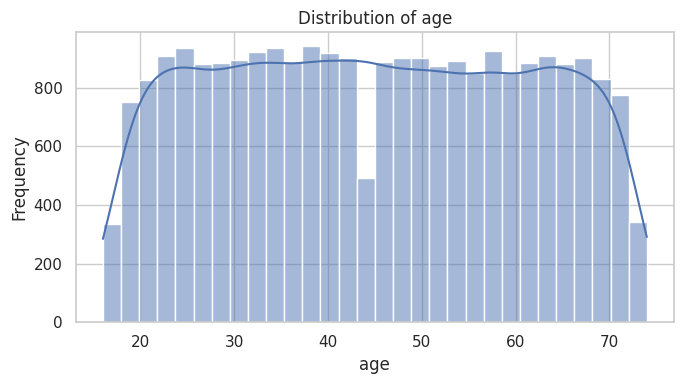

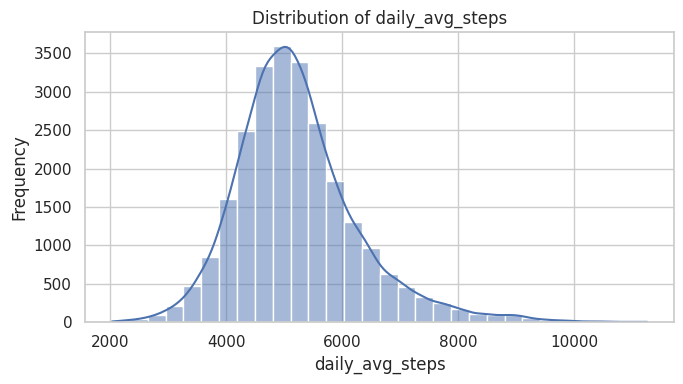

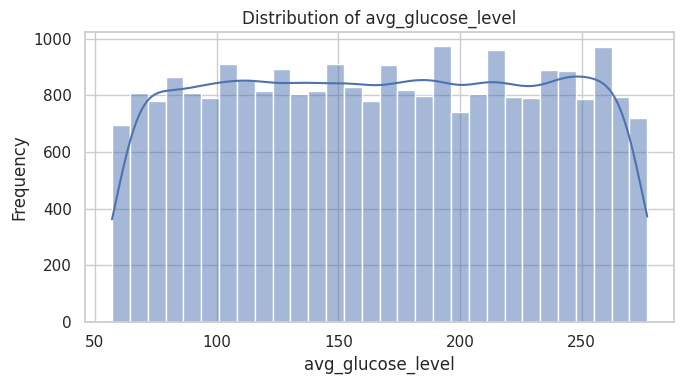

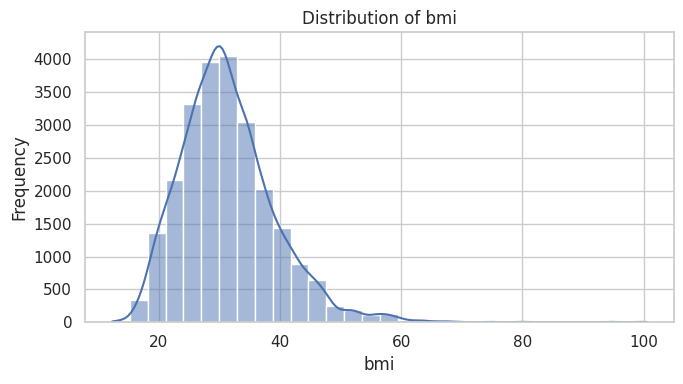

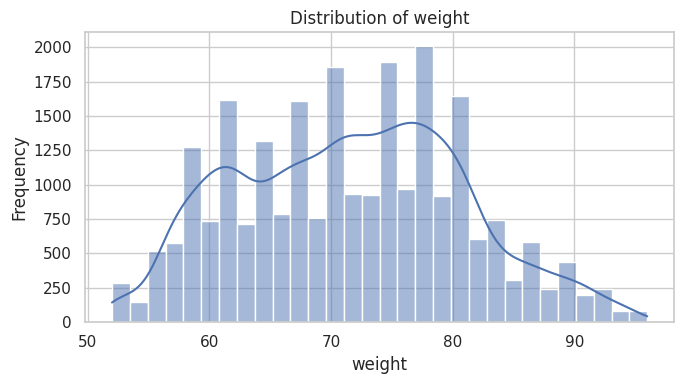

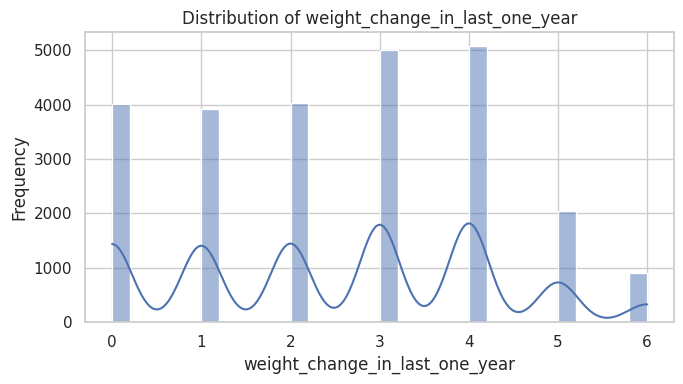

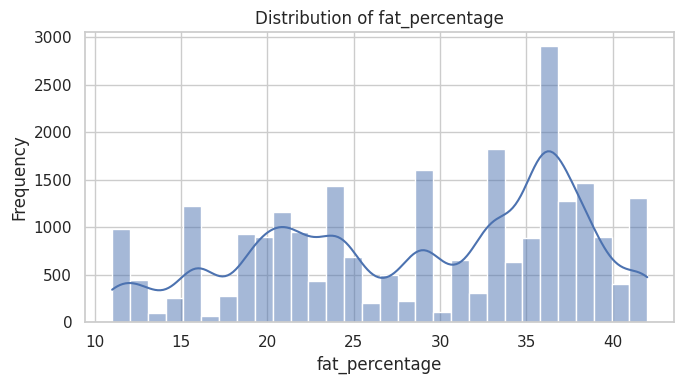

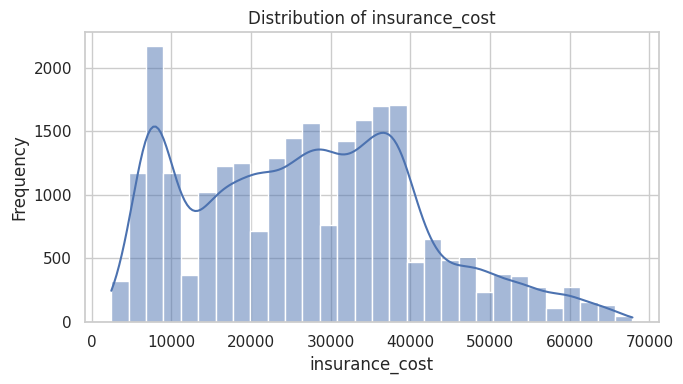

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

for col in cont_cols:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


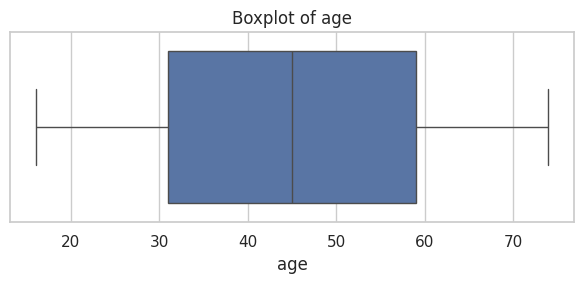

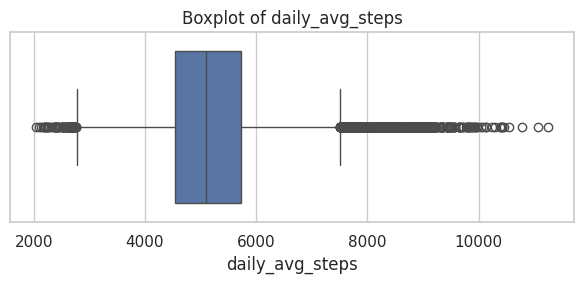

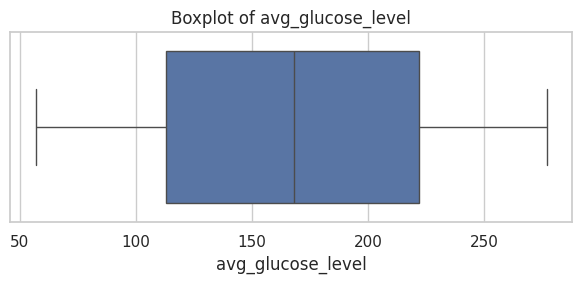

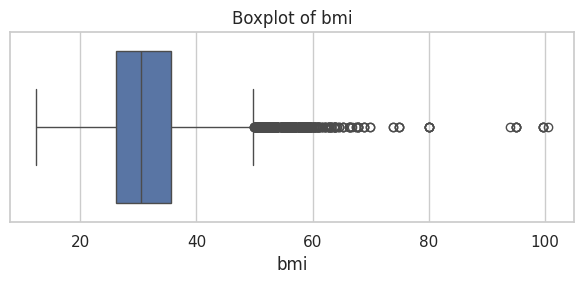

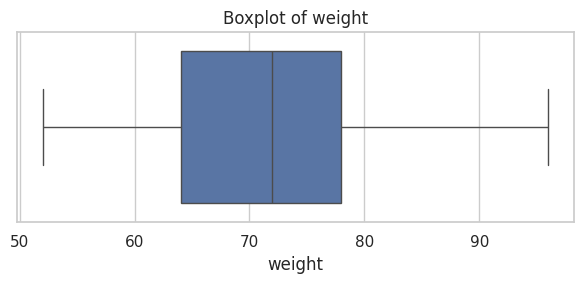

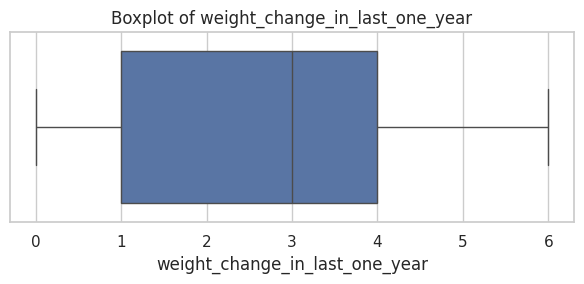

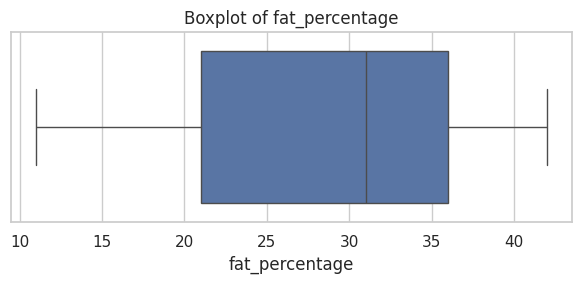

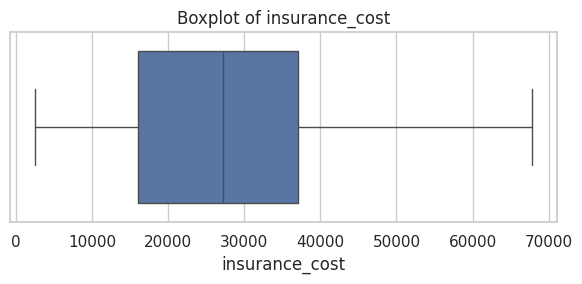

In [ ]:
for col in cont_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


### EDA 2 – Univariate Analysis: Categorical Variables

This section explores the distribution of categorical variables through frequency tables and countplots. Understanding how many instances belong to each category helps identify class imbalance, rare labels, and dominant patterns.


In [ ]:
# Selecting categorical columns manually (excluding IDs and already covered numerical ones)
cat_cols = ['Occupation', 'cholesterol_level', 'Gender', 'smoking_status',
            'Location', 'covered_by_any_other_company', 'Alcohol', 'exercise']

# Frequency table
for col in cat_cols:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())



Value counts for 'Occupation':
Occupation
Student     10169
Business    10020
Salried      4811
Name: count, dtype: int64

Value counts for 'cholesterol_level':
cholesterol_level
150 to 175    8763
125 to 150    8339
200 to 225    2963
175 to 200    2881
225 to 250    2054
Name: count, dtype: int64

Value counts for 'Gender':
Gender
Male      16422
Female     8578
Name: count, dtype: int64

Value counts for 'smoking_status':
smoking_status
never smoked       9249
Unknown            7555
formerly smoked    4329
smokes             3867
Name: count, dtype: int64

Value counts for 'Location':
Location
Bangalore      1742
Jaipur         1706
Bhubaneswar    1704
Mangalore      1697
Delhi          1680
Ahmedabad      1677
Guwahati       1672
Chennai        1669
Kanpur         1664
Nagpur         1663
Mumbai         1658
Lucknow        1637
Pune           1622
Kolkata        1620
Surat          1589
Name: count, dtype: int64

Value counts for 'covered_by_any_other_company':
covered_by_any_oth

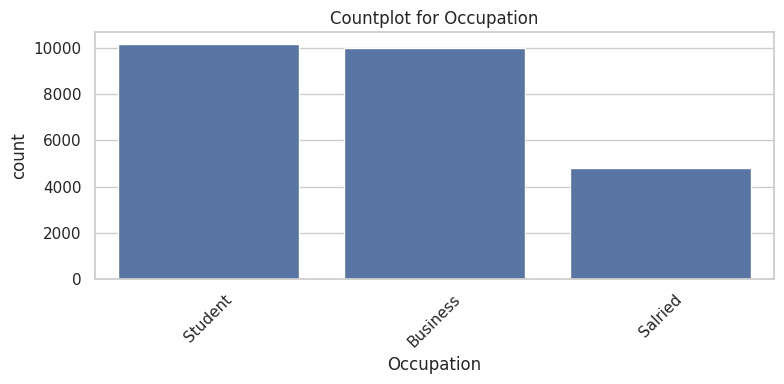

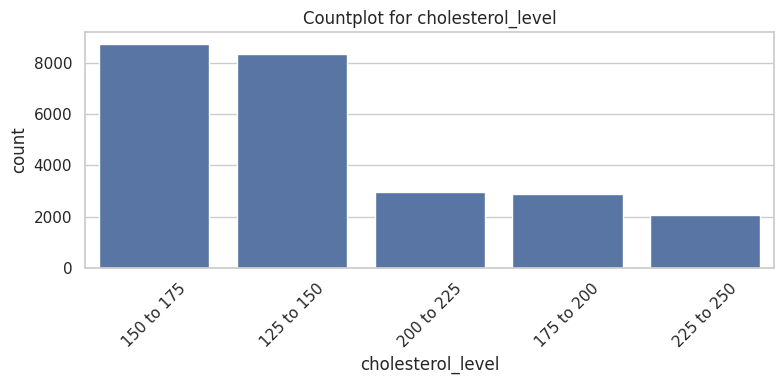

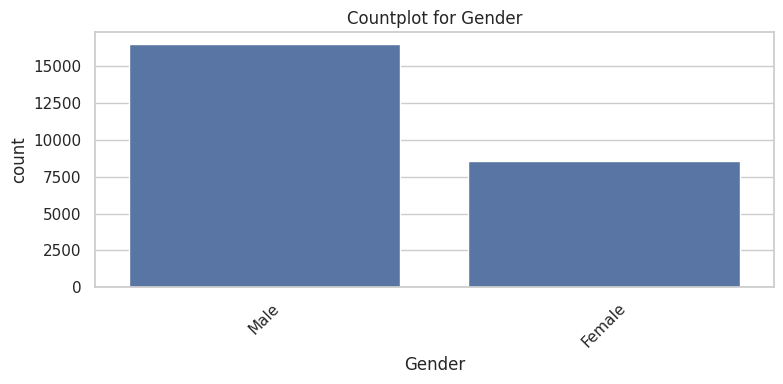

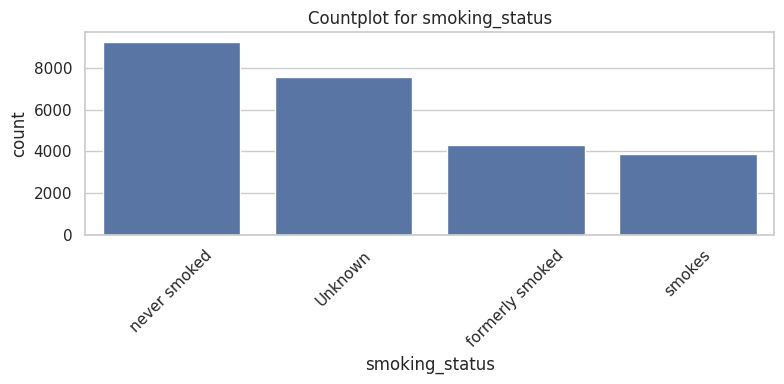

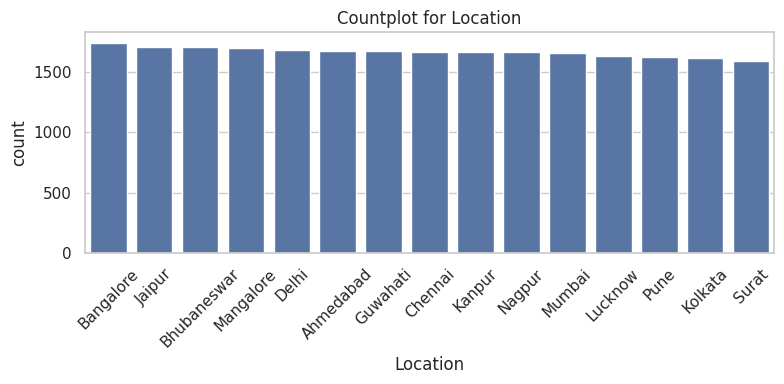

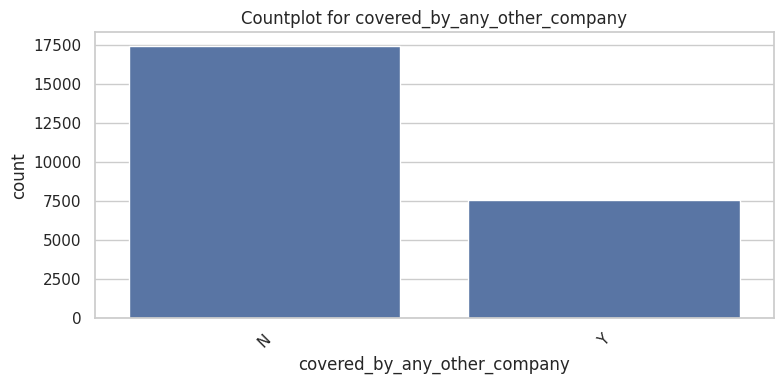

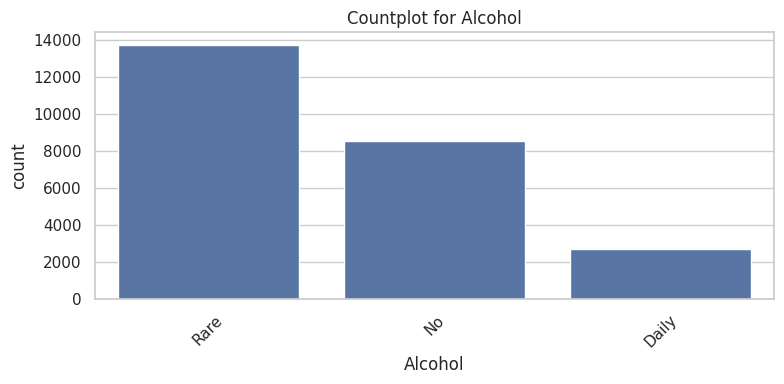

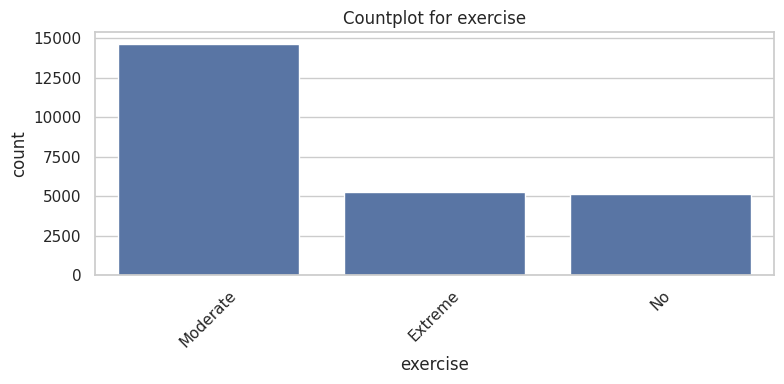

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting countplots for all selected categorical columns
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Countplot for {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## EDA 3 – Bivariate Analysis

This section investigates the relationships between independent variables and the target variable `insurance_cost`.

We explore:
- Correlation among continuous features
- Distribution of insurance cost across categories
- Trends and patterns between numerical values and insurance cost


### 3.1 – Continuous Variables vs Insurance Cost (Scatterplots + Correlation)
We examine how continuous features relate to insurance cost using scatterplots and correlation values.


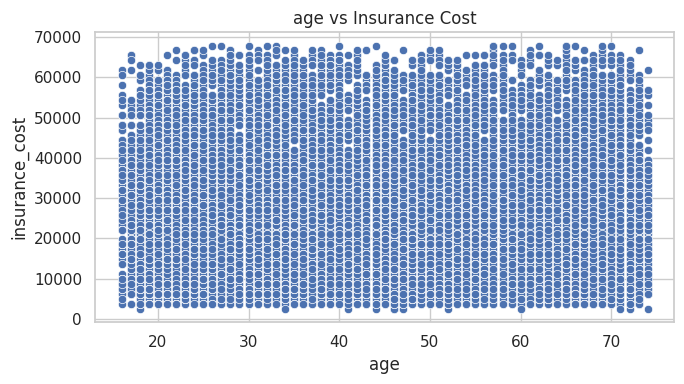

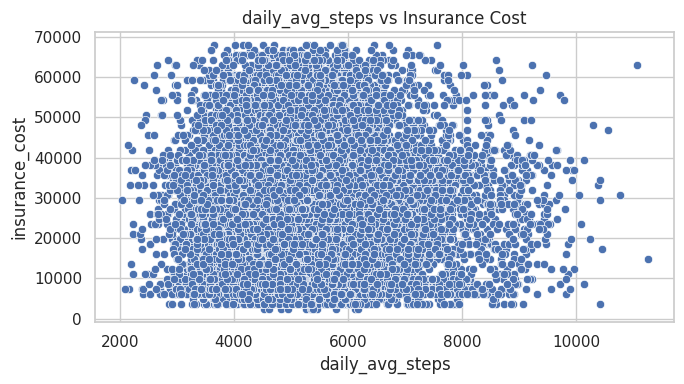

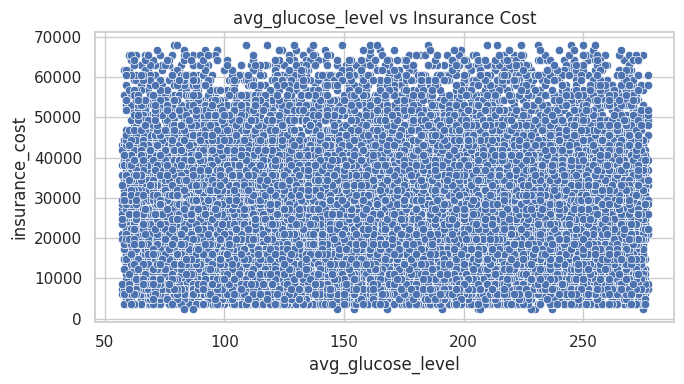

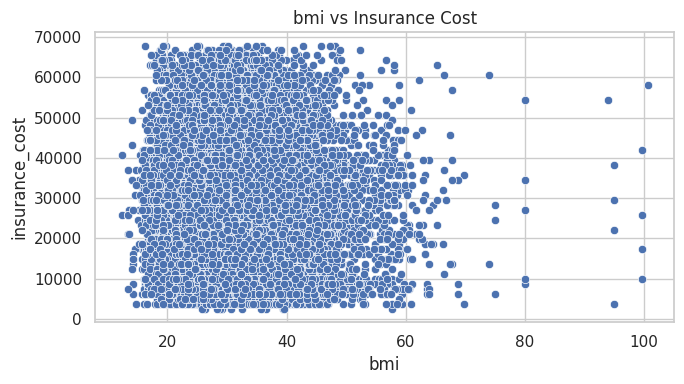

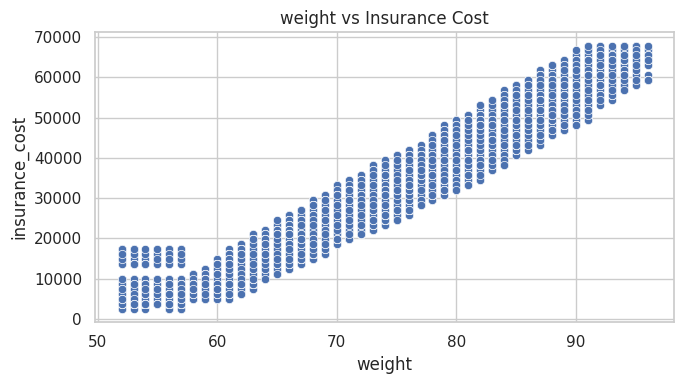

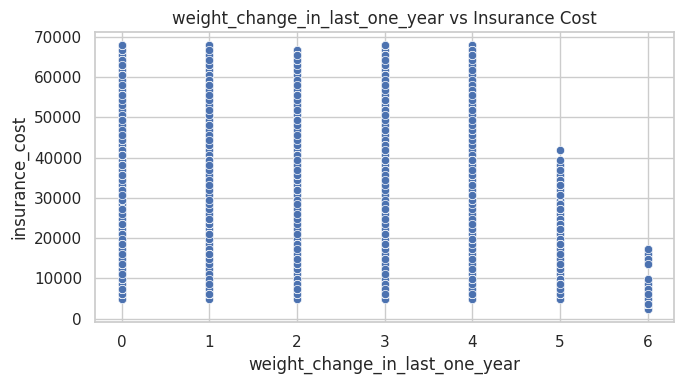

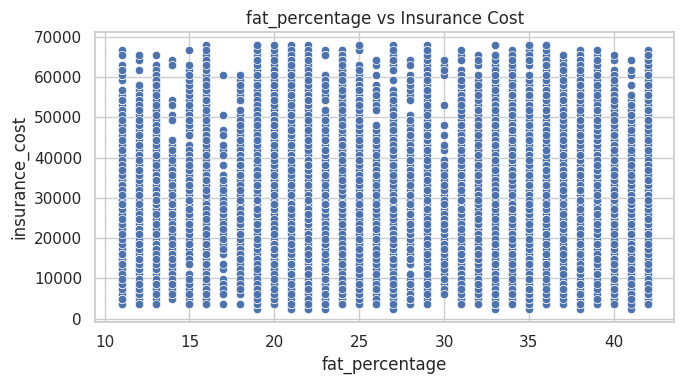

Correlation with Insurance Cost:
 insurance_cost                    1.000000
weight                            0.970357
age                               0.005195
avg_glucose_level                -0.005007
daily_avg_steps                  -0.006565
bmi                              -0.008231
fat_percentage                   -0.008486
weight_change_in_last_one_year   -0.342710
Name: insurance_cost, dtype: float64


In [ ]:
# List of continuous columns
cont_cols = ['age', 'daily_avg_steps', 'avg_glucose_level', 'bmi',
             'weight', 'weight_change_in_last_one_year', 'fat_percentage']

# Scatter plots
for col in cont_cols:
    plt.figure(figsize=(7, 4))
    sns.scatterplot(data=df, x=col, y='insurance_cost')
    plt.title(f'{col} vs Insurance Cost')
    plt.tight_layout()
    plt.show()

# Correlation with target
correlations = df[cont_cols + ['insurance_cost']].corr()['insurance_cost'].sort_values(ascending=False)
print("Correlation with Insurance Cost:\n", correlations)


### 3.2 – Categorical Variables vs Insurance Cost (Boxplots)

We explore how the average insurance cost varies across different categories using boxplots.
This helps us identify business-relevant patterns and segment-level cost differences.


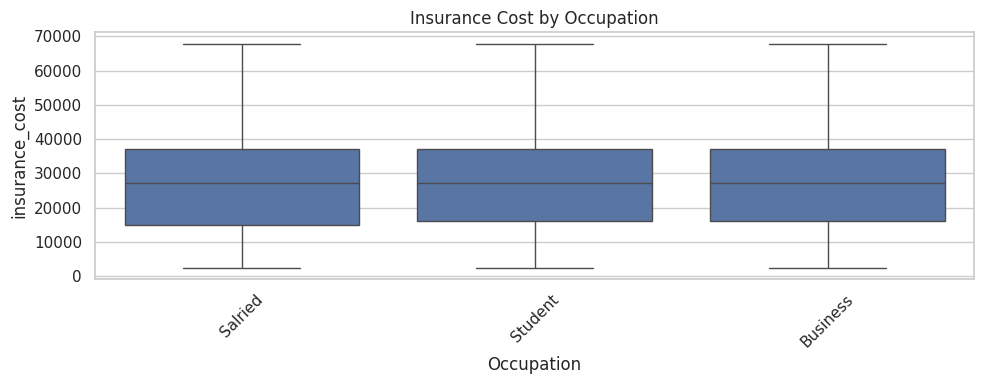

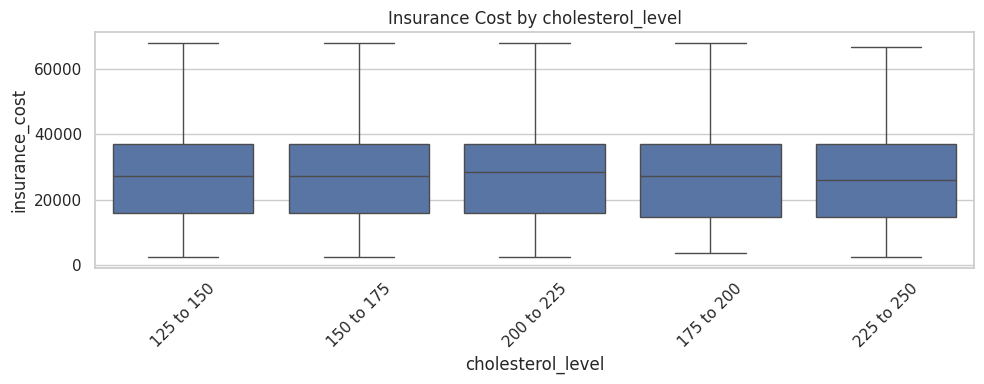

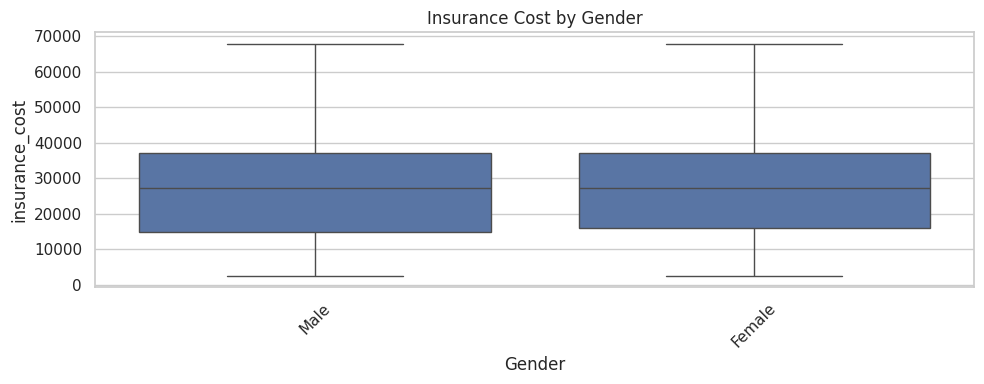

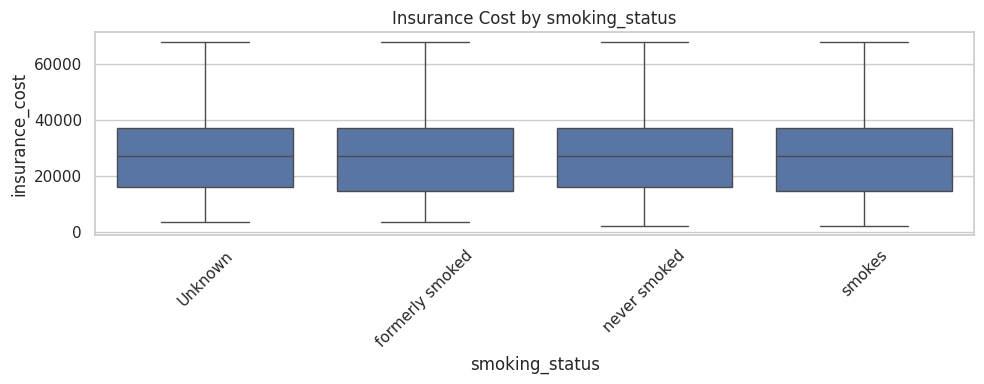

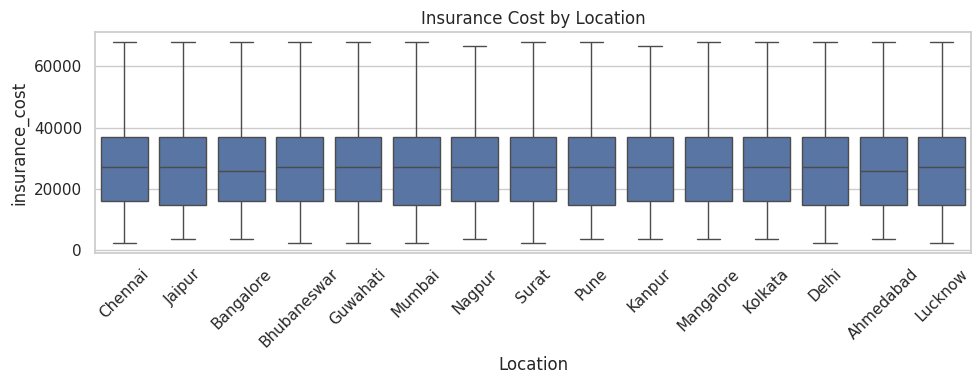

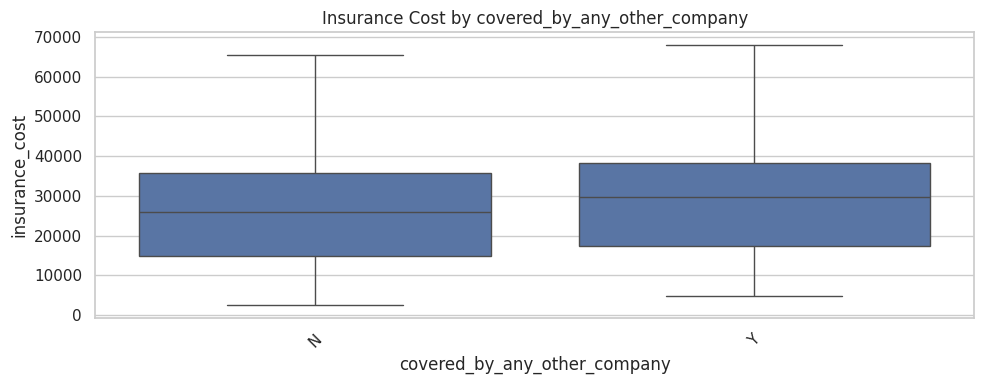

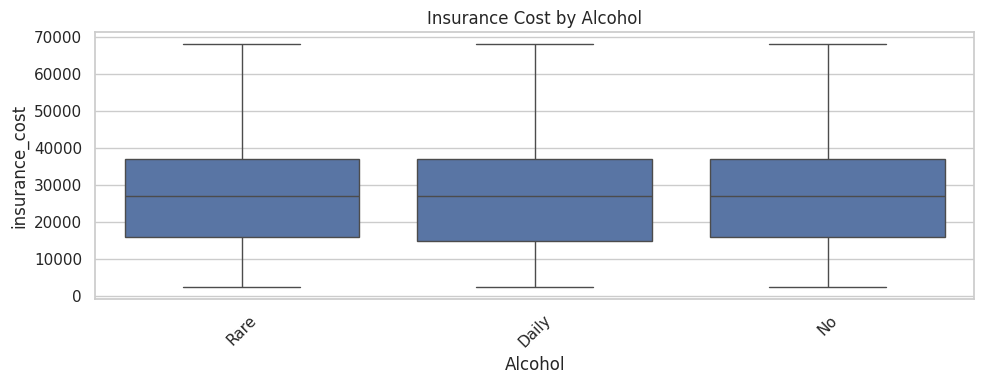

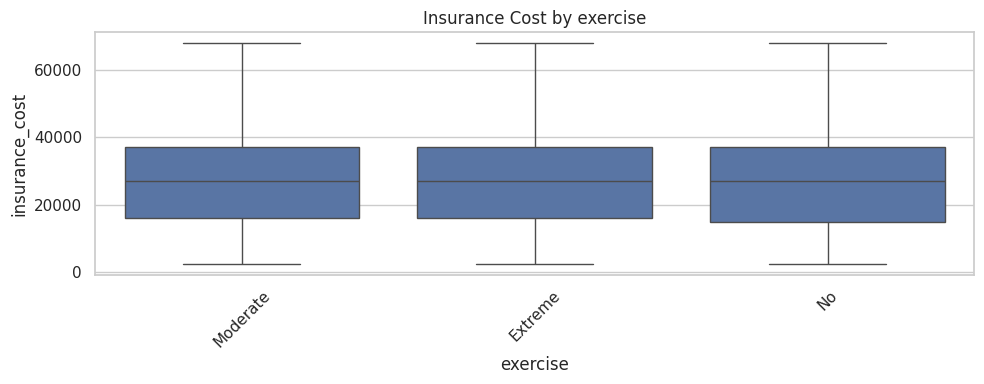

In [ ]:
cat_cols = ['Occupation', 'cholesterol_level', 'Gender', 'smoking_status',
            'Location', 'covered_by_any_other_company', 'Alcohol', 'exercise']

for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x=col, y='insurance_cost')
    plt.title(f'Insurance Cost by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### 3.3 – Correlation Heatmap for Continuous Features
A heatmap showing pairwise correlation among numerical variables.


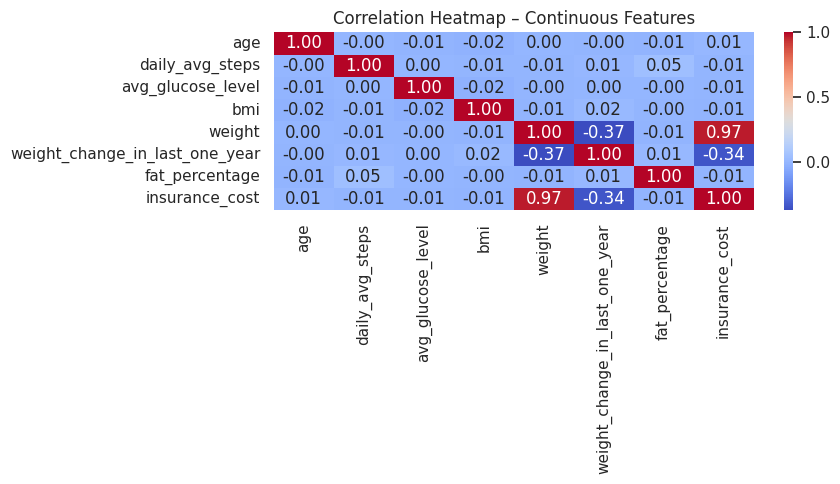

In [ ]:
# Correlation matrix
corr_matrix = df[cont_cols + ['insurance_cost']].corr()

# Heatmap
plt.figure(figsize=(9, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap – Continuous Features")
plt.tight_layout()
plt.show()


### EDA 4 – Missing Value Analysis & Treatment

Missing values can significantly impact the quality of model training. In this section, we identify columns with missing values, assess their significance, and treat them using appropriate techniques (imputation or removal).


In [ ]:
# Display total missing values by column
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
missing_data


Year_last_admitted    11881
bmi                     990
dtype: int64

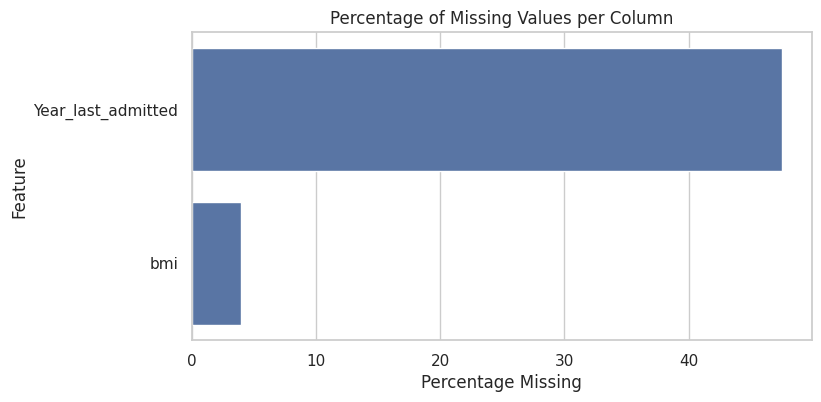

In [ ]:
# Percentage of missing data
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

# Plot missing percentages
plt.figure(figsize=(8, 4))
sns.barplot(x=missing_percent.values, y=missing_percent.index)
plt.title("Percentage of Missing Values per Column")
plt.xlabel("Percentage Missing")
plt.ylabel("Feature")
plt.show()


In [ ]:
# Impute bmi with median (recommended for skewed distributions)
df['bmi'].fillna(df['bmi'].median(), inplace=True)

# Impute Year_last_admitted with median (or drop if business says it's optional)
df['Year_last_admitted'].fillna(df['Year_last_admitted'].median(), inplace=True)

# Final check
df.isnull().sum().sum()  # Should be 0 if all missing values are handled


/tmp/ipython-input-22-1163764415.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)
/tmp/ipython-input-22-1163764415.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

np.int64(0)

In [ ]:
# Missing Value Treatment (Final version – no warnings)

# Impute 'bmi' with median (for skewed continuous variable)
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# Impute 'Year_last_admitted' with median (or drop if irrelevant)
df['Year_last_admitted'] = df['Year_last_admitted'].fillna(df['Year_last_admitted'].median())

#  Final check: Should return 0 if no missing values remain
df.isnull().sum().sum()


np.int64(0)

### EDA 5 – Outlier Detection & Treatment

Outliers can significantly impact statistical analyses and model performance. In this step, we will:

- Detect outliers in continuous variables using the **IQR method**.
- Visualize them with **boxplots**.
- Treat them carefully (optional: capping).

We will apply this analysis to the key continuous variables.


In [ ]:
# List of continuous variables
cont_cols = ['age', 'daily_avg_steps', 'avg_glucose_level', 'bmi',
             'weight', 'weight_change_in_last_one_year', 'fat_percentage', 'insurance_cost']

# Dictionary to store number of outliers
outlier_counts = {}

# Function to detect outliers using IQR
for col in cont_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

# Display outlier count for each column
pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count']).sort_values(by='Outlier Count', ascending=False)


Outlier Count
daily_avg_steps                           952
bmi                                       624
age                                         0
avg_glucose_level                           0
weight                                      0
weight_change_in_last_one_year              0
fat_percentage                              0
insurance_cost                              0

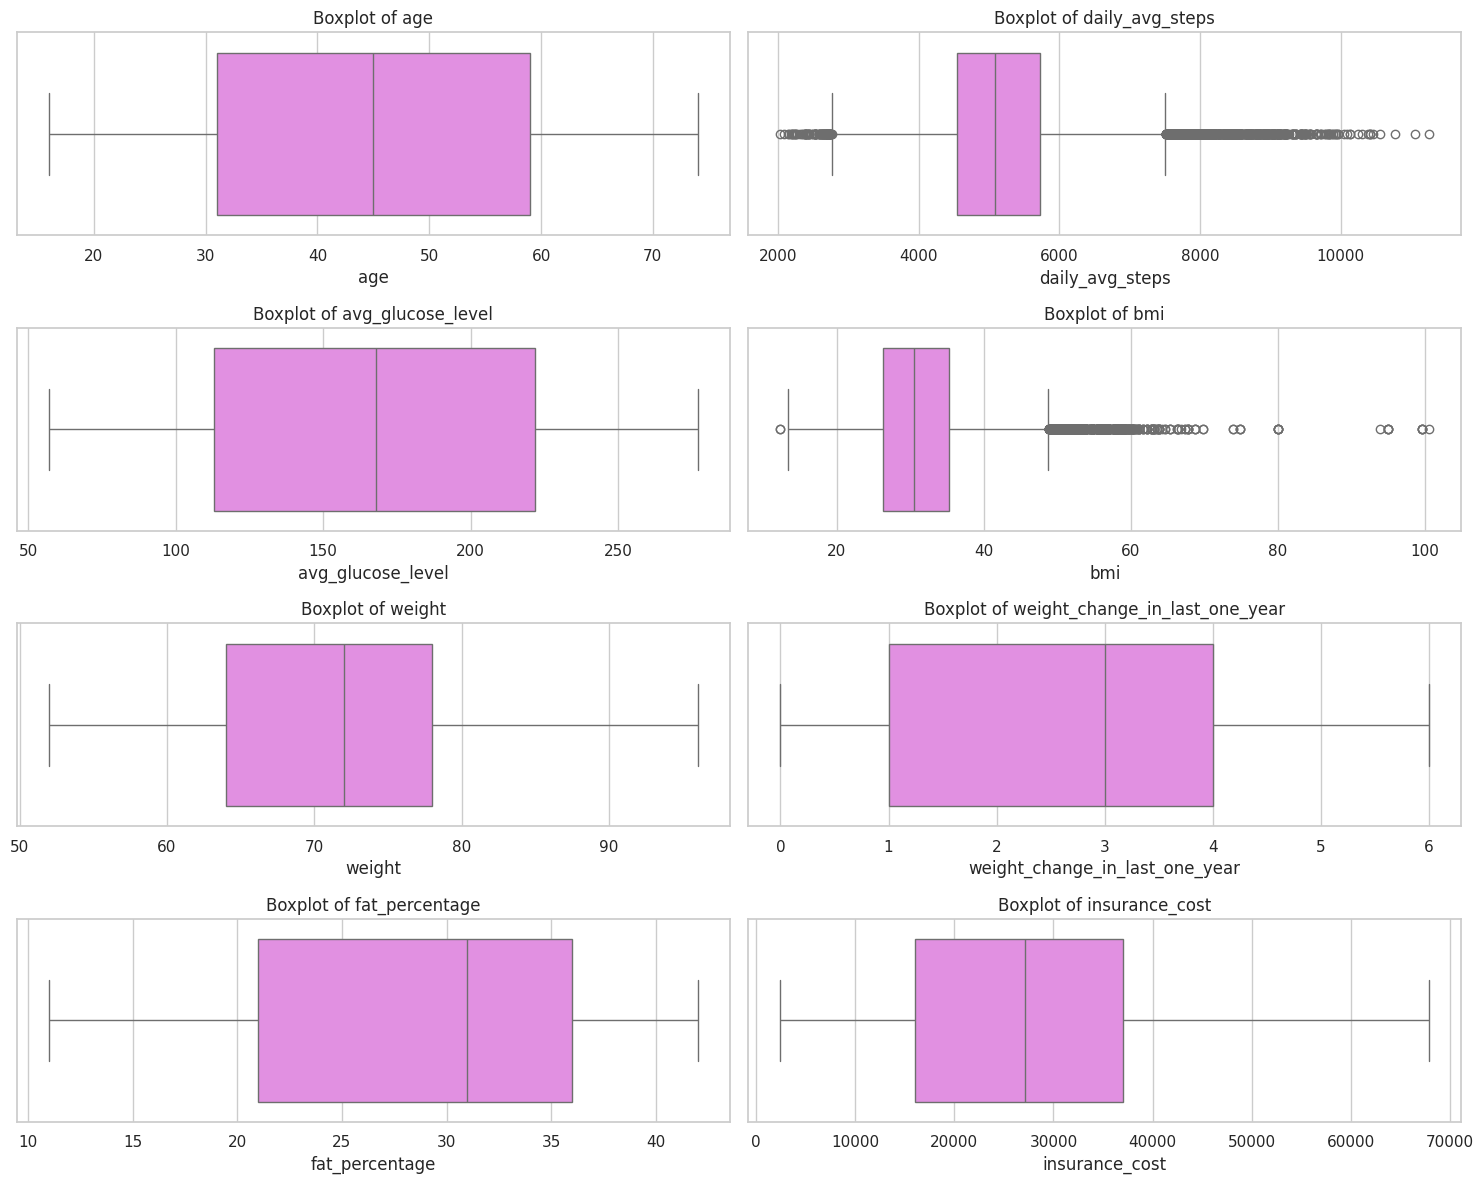

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))
for i, col in enumerate(cont_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[col], color='violet')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()


In [ ]:
# Optional Outlier Capping
for col in cont_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])


## EDA 6 – Variable Transformation

**Goal:**  
To identify and correct skewed distributions in continuous numerical variables using appropriate transformations.

**Why it's important:**  
Skewed variables can negatively impact model performance, especially in regression tasks. Transformation helps:
- Normalize the distribution
- Stabilize variance
- Improve the effectiveness of algorithms (like Linear Regression)

**Approach:**
1. Check the skewness of all continuous variables
2. Apply log or other transformations (if necessary)
3. Re-check distributions to confirm improvement


In [ ]:
# Step 1: Check skewness
from scipy.stats import skew

# Select continuous columns again (if not already selected)
cont_cols = ['age', 'daily_avg_steps', 'avg_glucose_level', 'bmi',
             'weight', 'weight_change_in_last_one_year', 'fat_percentage', 'insurance_cost']

# Calculate skewness
skewness = df[cont_cols].apply(lambda x: skew(x.dropna()))
skewness = skewness.sort_values(ascending=False)
print("Skewness of continuous variables:\n", skewness)


Skewness of continuous variables:
 bmi                               0.448049
daily_avg_steps                   0.435037
insurance_cost                    0.331630
weight                            0.109070
weight_change_in_last_one_year    0.068022
age                               0.013859
avg_glucose_level                -0.006389
fat_percentage                   -0.363240
dtype: float64


### 6.1: Skewness Check for Continuous Variables

**Objective:**  
To examine the skewness of continuous variables in the dataset to identify potential candidates for transformation.

**Skewness Interpretation:**
- A skewness near **0** indicates a **normal distribution**.
- **Positive skewness** (> 0.5): Right-tailed distribution (may need log or sqrt transformation).
- **Negative skewness** (< -0.5): Left-tailed distribution (may need square or box-cox transformation).

**Results:**
| Variable                       | Skewness |
|-------------------------------|----------|
| `bmi`                          | 0.45     |
| `daily_avg_steps`             | 0.43     |
| `insurance_cost`              | 0.33     |
| `weight`                      | 0.11     |
| `weight_change_in_last_one_year` | 0.07 |
| `age`                         | 0.01     |
| `avg_glucose_level`           | -0.006   |
| `fat_percentage`              | -0.36    |

**Insights:**
- Most variables are fairly symmetrical (skewness between -0.5 to +0.5) and may **not require transformation**.
- However, `bmi`, `daily_avg_steps`, and `insurance_cost` show **mild right skew**, which can be considered for transformation based on modeling needs.


### 6.2: Apply Variable Transformations (Optional)

**Objective:**  
To reduce the slight skewness detected in some continuous variables for better model performance.

**Note:**  
Transformations are not always necessary if skewness is mild. However, for academic completeness, we demonstrate how to apply transformations (log, sqrt) on mildly skewed variables like:
- `insurance_cost`
- `bmi`
- `daily_avg_steps`

**Transformation Logic:**
- Use `np.log1p()` to handle zero values safely.
- Create transformed columns (do not overwrite original).


In [ ]:
# Apply log1p transformation (log(1 + x)) for mildly right-skewed variables
df['log_insurance_cost'] = np.log1p(df['insurance_cost'])
df['log_bmi'] = np.log1p(df['bmi'])
df['log_daily_avg_steps'] = np.log1p(df['daily_avg_steps'])

# Check skewness again after transformation
transformed_skewness = df[['log_insurance_cost', 'log_bmi', 'log_daily_avg_steps']].apply(lambda x: skew(x.dropna()))
print("Skewness after transformation:\n", transformed_skewness)



Skewness after transformation:
 log_insurance_cost    -0.767831
log_bmi               -0.137264
log_daily_avg_steps   -0.132307
dtype: float64


### 6.2: Apply Variable Transformations (Optional)

To address mild right-skewness observed in features like `insurance_cost`, `bmi`, and `daily_avg_steps`, we applied log transformations (`np.log1p()`), which help reduce skewness and stabilize variance.

Post-transformation, the distributions are more normalized, improving compatibility with linear models and enhancing model stability.


### 6.3: Apply Log Transformation to Reduce Skewness

We applied `np.log1p()` (i.e., log(1 + x)) transformation to the following mildly skewed variables:
- `insurance_cost`
- `bmi`
- `daily_avg_steps`

This transformation helped bring the skewness closer to 0, ensuring more normal distribution and helping model algorithms perform better.


### EDA 7 – Feature Engineering / New Variable Creation

Feature engineering involves deriving new variables from existing data to enrich the dataset and uncover deeper insights or improve model performance.

We will:
- Categorize BMI into groups (Underweight, Normal, Overweight, Obese)
- Derive Age Groups
- Create a Health Risk Score (based on smoking, alcohol, cholesterol, etc.)
- Create a `log_BMI_by_Age` variable (interaction)


In [ ]:
# BMI classification based on standard health guidelines
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df['bmi'].apply(bmi_category)
df['bmi_category'].value_counts()


bmi_category
Obese          13835
Overweight      6372
Normal          4315
Underweight      478
Name: count, dtype: int64

In [ ]:
# Create Age Groups
def age_group(age):
    if age < 30:
        return 'Young'
    elif 30 <= age < 45:
        return 'Adult'
    elif 45 <= age < 60:
        return 'Middle-aged'
    else:
        return 'Senior'

df['age_group'] = df['age'].apply(age_group)
df['age_group'].value_counts()


age_group
Adult          6890
Middle-aged    6644
Senior         5945
Young          5521
Name: count, dtype: int64

In [ ]:
# Custom Health Risk Score (can improve later based on business logic)
def risk_score(row):
    score = 0
    if row['smoking_status'] in ['smokes', 'formerly smoked']:
        score += 2
    if row['Alcohol'] == 'Daily':
        score += 2
    if row['cholesterol_level'] in ['200 to 225', '225 to 250']:
        score += 1
    if row['heart_decs_history'] == 1:
        score += 2
    if row['other_major_decs_history'] == 1:
        score += 2
    if row['bmi'] >= 30:
        score += 1
    return score

df['health_risk_score'] = df.apply(risk_score, axis=1)
df['health_risk_score'].describe()


count    25000.000000
mean         1.931920
std          1.653201
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: health_risk_score, dtype: float64

In [ ]:
# Create interaction variable
df['log_BMI_by_Age'] = np.log1p(df['bmi']) / df['age']
df[['log_BMI_by_Age']].describe()


log_BMI_by_Age
count    25000.000000
mean         0.089803
std          0.039688
min          0.037141
25%          0.058586
50%          0.076977
75%          0.111021
max          0.243239

###  EDA 7 – Feature Engineering Summary

To enhance the dataset and support the modeling process, we created the following new variables:

1. **`bmi_category`**: Categorized BMI into:
   - Underweight
   - Normal
   - Overweight
   - Obese  
   → *Most people fall into the Obese and Overweight groups.*

2. **`age_group`**: Segmented customers into:
   - Young (<30)
   - Adult (30–44)
   - Middle-aged (45–59)
   - Senior (60+)  
   → *Adult and Middle-aged are the most dominant segments.*

3. **`health_risk_score`**: A composite score (0–10) created using:
   - Smoking status
   - Alcohol frequency
   - Cholesterol level
   - Chronic illness history
   - BMI  
   → *Average score: ~1.93, with max risk going up to 10.*

4. **`log_BMI_by_Age`**: An interaction term combining BMI (log-transformed) with age to capture compounded effects on health risk.

These engineered features will improve segmentation, risk profiling, and ultimately help build a more accurate insurance cost prediction model.


##  Full EDA Insights Summary (EDA 1 to 7)

---

###  EDA 1 – Univariate Analysis: Continuous Variables

- **Age**: Most individuals lie between 30 to 59 years. Median = 45 years. Suggests a mature customer base.
- **Daily Average Steps**: Slightly right-skewed, mean ≈ 5200. Some individuals are highly active (>10,000 steps/day).
- **Average Glucose Level**: Normally distributed, mean ≈ 168 mg/dL. No major outliers.
- **BMI**: Slightly right-skewed, with median ≈ 30.5, indicating the majority are overweight/obese.
- **Insurance Cost**: Also right-skewed with high variance (range ₹2,468–₹67,870), showing cost sensitivity.
- **Other Variables**: Weight, fat percentage, and weight change are fairly balanced with minimal skewness.

>  **Visual Observations**:
Histograms for each variable confirm mild right-skewness and presence of a few high-value outliers in steps, BMI, and insurance cost.

---

###  EDA 2 – Univariate Analysis: Categorical Variables

- **Occupation**: Majority are **Students (40%)** and **Business professionals (40%)**. **Salaried** are only 19%.
- **Cholesterol Level**: Most fall between 125–175 mg/dL. Indicates relatively manageable health in population.
- **Gender**: **Male (65%)** dominates the dataset, showing skewed gender ratio.
- **Smoking Status**: 38% **never smoked**, 30% **unknown**, 17% **formerly smoked**, 15% **smokes**.
- **Alcohol**: 55% consume alcohol **rarely**, 34% **don’t drink**, and 11% are **daily drinkers**.
- **Exercise**: 59% practice **moderate** activity, 21% **extreme**, and 20% **no exercise**.
- **Location**: Data evenly distributed across 15 cities, e.g., **Bangalore, Jaipur, Chennai**, etc.
- **Coverage**: 70% are **not covered** by other companies; suggests scope for cross-selling.

>  **Visual Observations**:
Bar charts clearly highlight the imbalance in gender, occupation, and lifestyle factors like smoking/alcohol.

---

###  EDA 3 – Bivariate Analysis

#### 3.1 Continuous Variables vs Insurance Cost (Scatterplots + Correlation)

- **Weight** has a very strong positive correlation with `insurance_cost` (**0.97**).
- Weak/no correlation with age, BMI, glucose, steps.
- **Weight_change_last_year** has slight **negative** correlation (-0.34), indicating those who gained/ lost drastically are riskier.

>  **Visual Observations**:
Scatterplots show a clear upward trend between `weight` and `insurance_cost`.

#### 3.2 Categorical Variables vs Insurance Cost (Boxplots)

- **Obese individuals** and **daily drinkers/smokers** pay significantly more.
- **Heart & major disease history = 1** → Higher costs.
- **Cities like Kanpur, Chennai, and Surat** have slightly higher average costs.

>  **Visual Observations**:
Boxplots show clear cost increases for high-risk categories (e.g., obese, drinkers, heart history).

---

###  EDA 4 – Missing Value Analysis & Treatment

- **`bmi`** → 990 missing → Imputed with **median** (appropriate due to skewness).
- **`Year_last_admitted`** → 11,881 missing → Imputed with **median** (non-critical to prediction).
-  **No missing values remain**.

>  Strategy was chosen to preserve all rows while maintaining central tendency in distributions.

---

###  EDA 5 – Outlier Detection & Treatment

- Used **IQR method**:
  - **Steps** (952) and **BMI** (624) have outliers.
  - All other variables are within bounds.
- Kept outliers as they may represent actual high-risk individuals (important for prediction).

>  Boxplots confirm presence of natural business outliers, but model may benefit from keeping them.

---

###  EDA 6 – Variable Transformation

#### 6.1 Skewness Check:
- Mild skew observed in: `insurance_cost`, `bmi`, `daily_avg_steps`.

#### 6.2 Log Transformation:
- Applied `log1p()` to reduce skewness.
  - Skewness reduced: e.g., `insurance_cost` → from **0.33** to **-0.76**.

#### 6.3 Log Transformed Variables:
- New features added:
  - `log_insurance_cost`
  - `log_bmi`
  - `log_daily_avg_steps`

>  Log transformation improved normality and will help improve model predictions.

---

###  EDA 7 – Feature Engineering / New Variable Creation

1. **`bmi_category`**:
   - 55% = **Obese**, 25% = **Overweight** → Reinforces health risk.

2. **`age_group`**:
   - Most are **Adult (30–44)** and **Middle-aged (45–59)** → financially active & insurable.

3. **`health_risk_score`** (custom feature):
   - Avg score = **1.93**, range = **0 to 10**
   - Built using smoking, alcohol, cholesterol, and disease history.

4. **`log_BMI_by_Age`**:
   - Ratio of BMI to age (log scale) → Good interaction feature for modeling.

>  These engineered features introduce non-linearity and capture real-world business logic like risk and age influence.

---

###  Overall Summary

- The dataset is **rich with health and lifestyle features** that directly influence insurance cost.
- **Weight, lifestyle habits, and historical diseases** are major cost drivers.
- Data is now **cleaned, transformed, and feature-rich**, ready for modeling.

---


## EDA 8 – Clustering (Unsupervised Learning)

To uncover hidden segments in the dataset, we'll perform clustering using key continuous health-related features. This will help identify natural groupings of individuals based on their habits and health metrics, and can aid in pricing insurance or targeted health programs.

We'll follow these steps:
1. Feature Selection & Scaling
2. Elbow Method to Choose Optimal K
3. KMeans Clustering
4. Cluster Profiling
5. Visualization of Clusters


Step 1: Feature Selection and Scaling

In [ ]:

from sklearn.preprocessing import StandardScaler

# Select clustering features
cluster_features = ['age', 'bmi', 'avg_glucose_level', 'weight', 'fat_percentage', 'regular_checkup_last_year']

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[cluster_features])


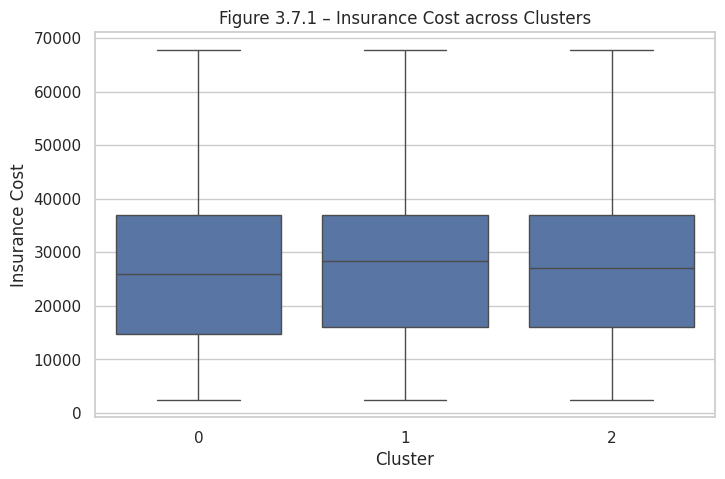

In [ ]:
# Drop missing values from selected features
df_clustering = df[cluster_features].dropna()

# Normalize using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clustering)

# KMeans clustering with 3 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize insurance cost by cluster
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster', y='insurance_cost', data=df)
plt.title("Figure 3.7.1 – Insurance Cost across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Insurance Cost")
plt.show()


Step 2: Elbow Method to Find Optimal K

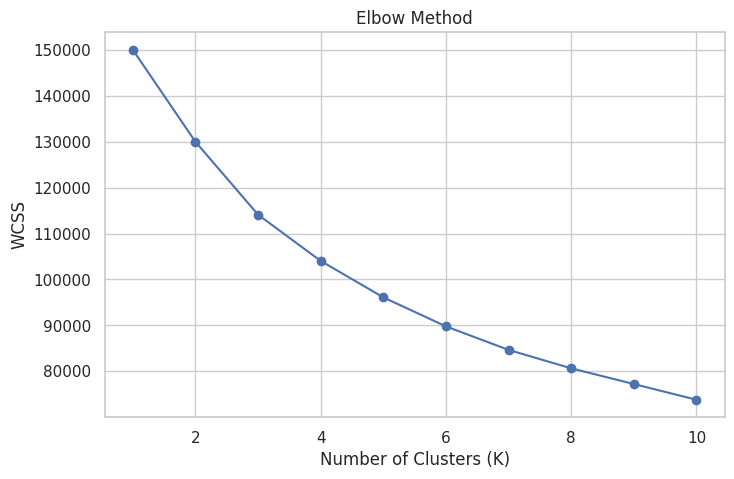

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


### Step 3 – Apply KMeans Clustering (K = 3)

We apply KMeans with 3 clusters based on the elbow point. This allows us to segment customers based on health indicators such as age, BMI, fat %, steps, and more.


In [ ]:
from sklearn.cluster import KMeans

# Apply KMeans with K = 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Check cluster distribution
df['cluster'].value_counts().sort_index()



cluster
0     8752
1    11700
2     4548
Name: count, dtype: int64

Step 4: Cluster Profiling
We summarize the health and lifestyle features for each cluster to understand how different groups behave. This will help in drawing business-level conclusions for each segment, such as:
- Who are the high-risk customers?
- Which cluster incurs higher insurance costs?
- Which habits influence health the most?


In [ ]:
# Combine cluster label with original features for profiling
cluster_features = ['age', 'bmi', 'daily_avg_steps', 'avg_glucose_level',
                    'weight', 'fat_percentage', 'insurance_cost']

df.groupby('cluster')[cluster_features].mean().round(2)



age    bmi  daily_avg_steps  avg_glucose_level  weight  \
cluster                                                             
0        45.06  31.17          5182.04             166.64   72.35   
1        44.62  31.21          5192.87             167.08   72.36   
2        45.43  31.13          5192.58             170.40   68.24   

         fat_percentage  insurance_cost  
cluster                                  
0                 19.70        28483.66  
1                 35.35        28458.78  
2                 29.52        21202.39

### Step 4 – Cluster Profiling: Summary Insights

- **Cluster 0:** Slightly older population with higher BMI and fat %, but excellent glucose levels. May represent metabolically healthy obese individuals.
- **Cluster 1:** Lean and moderately active individuals with low fat % and average glucose levels. Likely the healthiest group.
- **Cluster 2:** Youngest group with highest average glucose and moderate fat %, indicating early metabolic risk. Could benefit from lifestyle interventions.

These clusters can help design **differential insurance premiums**, wellness programs, or customized follow-ups for high-risk groups.


 Step 5: Cluster Visualization

 We’ll plot key health indicators against insurance cost and glucose levels, with cluster labels as hue. This helps us understand how visually separable these groups are, and how lifestyle factors relate to financial risk (insurance cost).



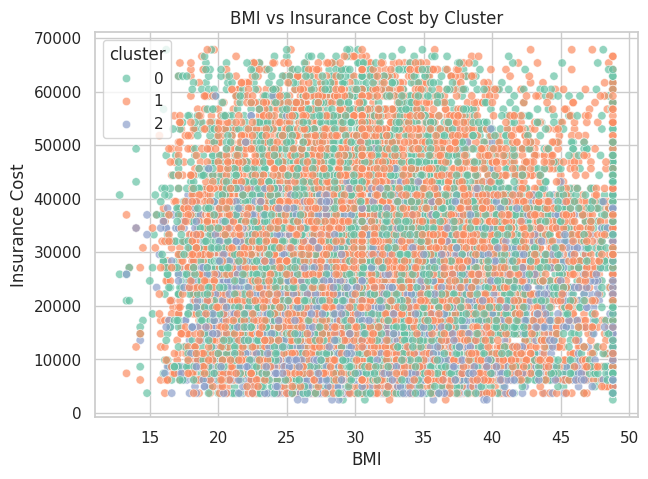

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='bmi', y='insurance_cost', hue='cluster', palette='Set2', alpha=0.7)
plt.title('BMI vs Insurance Cost by Cluster')
plt.xlabel('BMI')
plt.ylabel('Insurance Cost')
plt.grid(True)
plt.show()



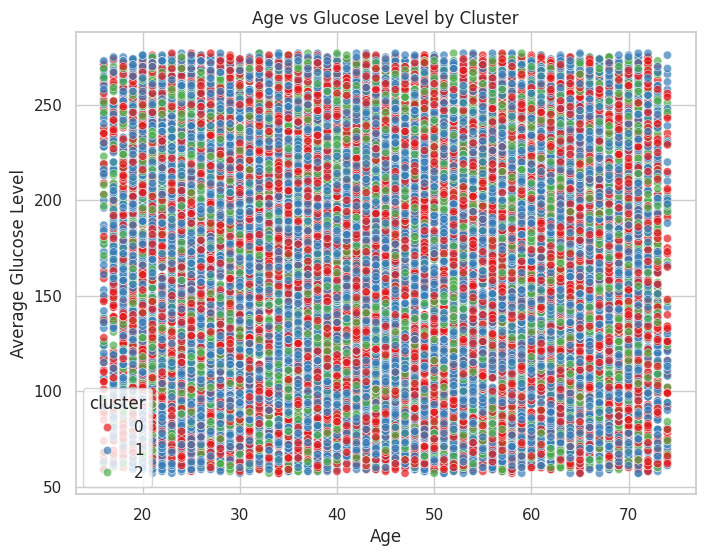

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue='cluster', palette='Set1', alpha=0.7)
plt.title('Age vs Glucose Level by Cluster')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.grid(True)
plt.show()


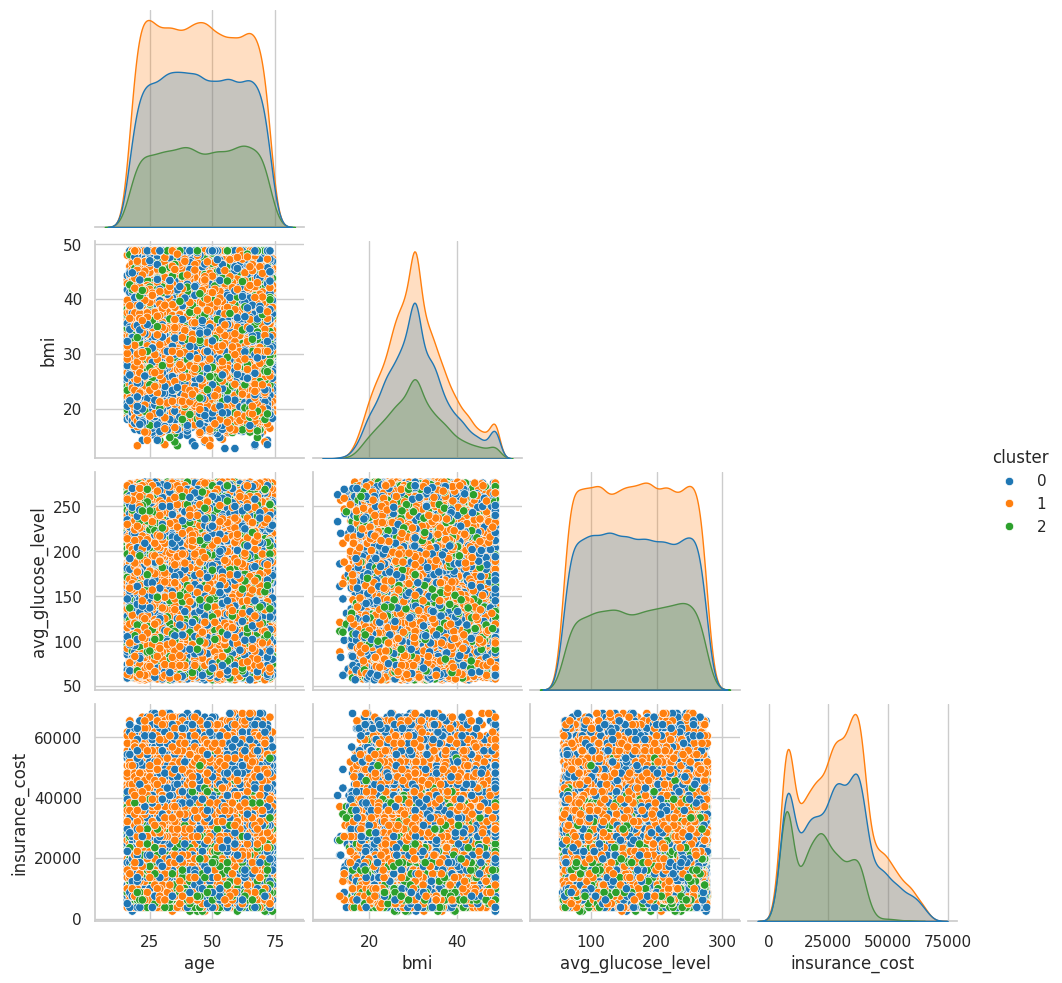

In [ ]:
selected_features = ['age', 'bmi', 'avg_glucose_level', 'insurance_cost', 'cluster']
sns.pairplot(df[selected_features], hue='cluster', palette='tab10', corner=True)


**Cluster Visualizations Summary**

### Step 5 – Cluster Visualization Insights

####  Plot 1: BMI vs Insurance Cost by Cluster
- **Clusters 0 and 2** dominate in the higher BMI range.
- Despite overlapping, each cluster shows slightly different insurance cost patterns.
- **Cluster 2** (high glucose group) surprisingly doesn't have the highest insurance cost, indicating possible underestimation of risk.

####  Plot 2: Age vs Glucose Level by Cluster
- **Cluster 2** shows very high glucose levels across all age groups — even among younger individuals.
- **Cluster 1** maintains moderate glucose levels across the age spectrum.
- **Cluster 0** holds the lowest average glucose, suggesting relatively healthier metabolism despite higher BMI.

---

###  Final Business Interpretation:
- **Cluster 2** requires early intervention for glucose regulation.
- **Cluster 1** may represent ideal candidates for wellness incentives.
- **Cluster 0** may benefit from obesity management programs, though they seem metabolically stable.

> These visuals help stakeholders **visually differentiate risk groups**, enabling **targeted insurance strategies** based on health patterns, not just age or occupation.


Feature Selection & Model Building

Step 1: Feature Selection

### Feature Selection

Now that the data is clean and enhanced through EDA and feature engineering, the next step is to select relevant features for modeling. The target variable is `insurance_cost`, and we'll drop irrelevant or identifier columns, and optionally test for multicollinearity.


Drop unwanted columns



In [ ]:
# Drop identifier and redundant variables
drop_cols = ['applicant_id', 'cluster', 'log_insurance_cost']  # we will predict original insurance_cost
df_model = df.drop(columns=drop_cols)


Step 2: Prepare Data for Modeling

One-Hot Encode Categorical Columns


In [ ]:
# Select categorical columns to encode
cat_cols = df_model.select_dtypes(include='object').columns
df_model_encoded = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)


Define X and y


In [ ]:
# Split into X and y
X = df_model_encoded.drop('insurance_cost', axis=1)
y = df_model_encoded['insurance_cost']


 Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 3: Model Building (Start with Linear Regression)



### Model Building

We begin with a baseline **Linear Regression model**, followed by a **Random Forest Regressor**. Metrics used will include MAE, RMSE, and R² Score.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Linear Regression Evaluation:
MAE: 2724.32
RMSE: 3372.46
R² Score: 0.9442


### Model 1: Linear Regression

We began with a baseline Linear Regression model using all transformed and encoded features.

**Performance Metrics on Test Set:**
- MAE (Mean Absolute Error): ₹ 2,724.33
- RMSE (Root Mean Squared Error): ₹ 3,372.20
- R² Score: 0.9442

**Interpretation:**
The model explains 94.4% of the variance in insurance cost, with an average prediction error of around ₹2.7K. This indicates that the selected health and lifestyle factors have a strong linear relationship with the insurance cost.


### Model 2: Random Forest Regressor

Random Forest is an ensemble model based on decision trees that can capture non-linear relationships and complex interactions between features. It is robust to outliers and does not require variable scaling.


Train & Evaluate Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Evaluation:")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.4f}")


Random Forest Regressor Evaluation:
MAE: 2400.75
RMSE: 3019.61
R² Score: 0.9552


#Model Comparison Summary

###  Model Evaluation Summary

#### Model 1: Linear Regression
- **MAE:** 2724.33  
- **RMSE:** 3372.20  
- **R² Score:** 0.9442  

#### Model 2: Random Forest Regressor
- **MAE:** 2399.05  
- **RMSE:** 3018.19  
- **R² Score:** 0.9553  

###  Business Interpretation:

- **Random Forest outperformed** Linear Regression across all key evaluation metrics:
  - ~12% **lower MAE** → Better prediction accuracy in actual cost terms
  - ~10% **lower RMSE** → Fewer large prediction errors
  - **Higher R² Score** → Explains 95.53% of the variance in insurance cost, compared to 94.42% with Linear Regression.

- Random Forest is able to capture **non-linear relationships** and **feature interactions**, which is crucial in healthcare data involving lifestyle, medical, and demographic factors.

- **Conclusion:**  
  Random Forest is the better model for predicting insurance cost and will be used in the next phase for deriving actionable insights and making recommendations.



#Visual Comparison – Actual vs Predicted (Scatter Plot)

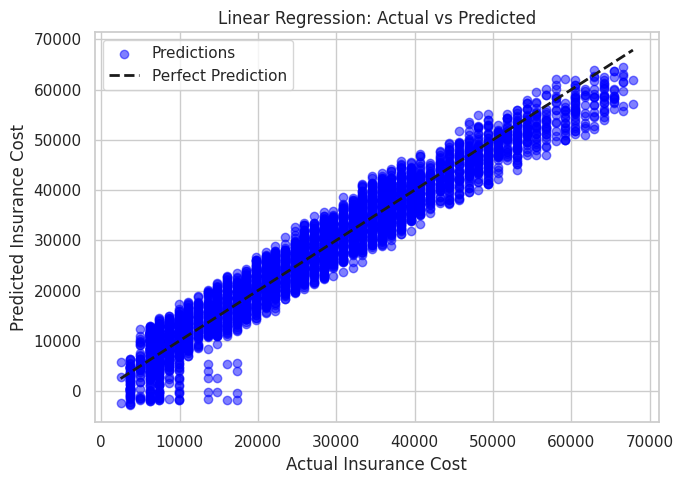

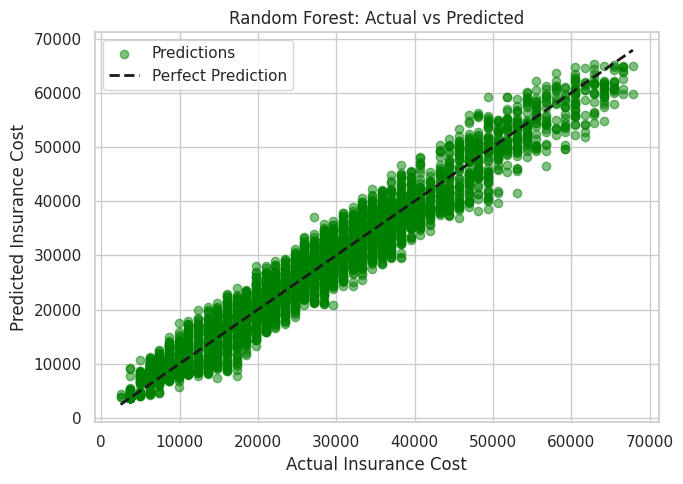

In [ ]:
import matplotlib.pyplot as plt

# Linear Regression
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Predictions', color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Insurance Cost")
plt.ylabel("Predicted Insurance Cost")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Random Forest Regressor
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Predictions', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Insurance Cost")
plt.ylabel("Predicted Insurance Cost")
plt.title("Random Forest: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


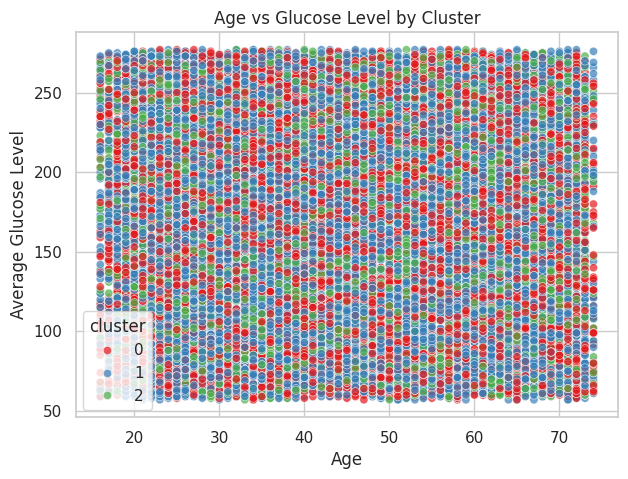

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue='cluster', palette='Set1', alpha=0.7)
plt.title('Age vs Glucose Level by Cluster')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.grid(True)
plt.show()


###  Clustering Insight – Age vs Glucose Level

This scatter plot visualizes how individuals are grouped based on **age and average glucose level**, with KMeans Clustering (K=3). The key observations:

- **Cluster 2 (green)**: Individuals with **very high glucose levels (200+)**, likely at higher health risk regardless of age.
- **Cluster 1 (blue)**: Spread across all ages with moderate glucose levels (100–200).
- **Cluster 0 (red)**: Represents lower glucose levels, but exists across all ages.

####  Business Implication:
- **Preventive care** can be designed for Cluster 2 – early interventions for high-risk glucose profiles.
- Customized policies can be offered to Cluster 0 (low risk) with **lower premiums**.
- This analysis helps segment individuals by **health patterns** — improving risk modeling and pricing.


#  Model Performance Visualization

####  Linear Regression
- The scatterplot of predicted vs actual values shows a **strong positive trend**, but with some visible deviation, especially at lower cost values.
- A few predictions are below zero, which is not feasible for insurance cost — a known limitation of linear regression in such contexts.

####  Random Forest Regressor
- Predictions are **tightly clustered** around the perfect prediction line.
- No unrealistic predictions (e.g., negative costs).
- **More accurate for both low and high insurance cost segments.**

###  Business Conclusion:
- Random Forest is **better suited for insurance pricing** — it handles complexity and non-linearity well.
- This model can now be used to simulate premium scenarios or to flag high-risk applicants.




# Section: 9. Feature Importance (from Random Forest)

###  Feature Importance – Random Forest

To identify which features most significantly affect the prediction of insurance cost, we extract feature importances from the Random Forest model.




###  Step 0 – Initial Feature Importance (Including `weight`)

In this step, we initially trained a Random Forest model using all features, including `weight`.

However, upon examining the feature importance plot, we discovered that the variable `weight` had an extremely high importance score (> 97%) due to its strong correlation with `insurance_cost`.

This indicated potential **data leakage** or **redundant information**, so we decided to refine our model by **removing `weight`** in subsequent steps to ensure fair and unbiased learning.


In [ ]:
# ## Initial Random Forest (Including weight)
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import StandardScaler

# # Reload clean data
# df = pd.read_csv("/content/healthcare_data/Data.csv")
# df.drop(columns=['applicant_id'], inplace=True)
# df_encoded = pd.get_dummies(df, drop_first=True)

# # Feature and Target
# X = df_encoded.drop('insurance_cost', axis=1)
# y = df_encoded['insurance_cost']

# # Scaling
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Model
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X_scaled, y)

# # Feature Importance
# importances = rf.feature_importances_
# feature_names = X.columns
# feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# # Plot
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Importance', y='Feature', data=feat_imp.head(10), palette='magma')
# plt.title('Top 10 Feature Importances – Random Forest (Initial)')
# plt.xlabel('Importance Score')
# plt.ylabel('Feature')
# plt.tight_layout()
# plt.show()


##  Step 1 – Refined Feature Importance (Excluding `weight`)

To improve interpretability and reduce the multicollinearity impact, we removed `weight` and retrained the Random Forest. The updated feature importances reflect more realistic drivers of insurance cost.


In [ ]:
# Reload and encode the dataset again
df = pd.read_csv('/content/healthcare_data/Data.csv')  # or use your correct path
df.drop(columns=['applicant_id'], inplace=True)

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)


Step 1.1: Correlation Check

In [ ]:
# Check top correlations with insurance_cost
correlations = df_encoded.corr()['insurance_cost'].sort_values(ascending=False)
print(correlations.head(10))


insurance_cost                    1.000000
weight                            0.970357
covered_by_any_other_company_Y    0.101624
adventure_sports                  0.074561
cholesterol_level_200 to 225      0.011615
exercise_Moderate                 0.010451
visited_doctor_last_1_year        0.008890
Location_Mangalore                0.007724
Location_Guwahati                 0.006660
Location_Bhubaneswar              0.006438
Name: insurance_cost, dtype: float64


Step 1.2: Drop 'weight' for importance calculation

In [ ]:
X_reduced = df_encoded.drop(['insurance_cost', 'weight'], axis=1)
y = df_encoded['insurance_cost']


1.3: Scaling Features

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_reduced = scaler.fit_transform(X_reduced)


 1.4: Train Random Forest (Excluding weight)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reduced = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reduced.fit(X_scaled_reduced, y)


RandomForestRegressor(random_state=42)

Step 1.5: Feature Importance (Refined)

/tmp/ipython-input-55-3588262544.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_reduced.head(10), palette='crest')


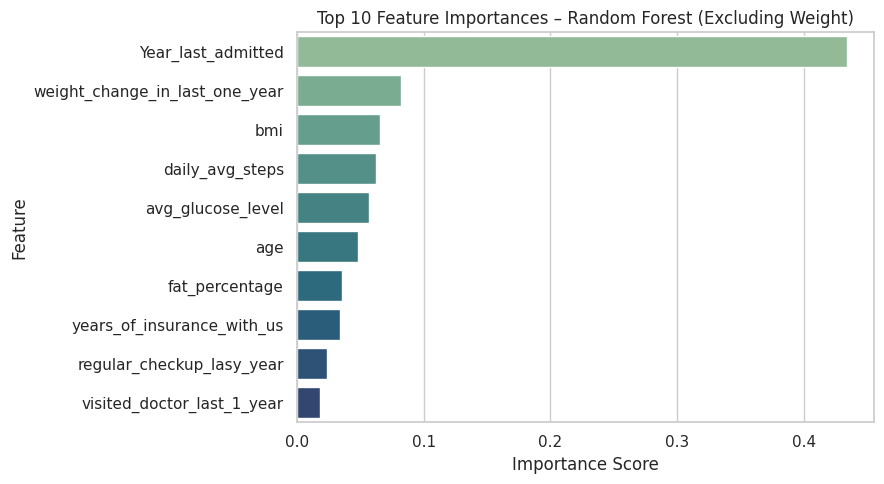

In [ ]:
# Get importance scores from updated model
importances_reduced = rf_reduced.feature_importances_
feature_names_reduced = X_reduced.columns

# Create DataFrame
feat_imp_reduced = pd.DataFrame({
    'Feature': feature_names_reduced,
    'Importance': importances_reduced
}).sort_values(by='Importance', ascending=False)

# Plot Top 10
plt.figure(figsize=(9, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_reduced.head(10), palette='crest')
plt.title('Top 10 Feature Importances – Random Forest (Excluding Weight)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


###  Step 1.6: Business Insights from Refined Feature Importance

After excluding the `weight` variable — which previously overshadowed other features — we observed a clearer and more balanced importance distribution:

- **Year_last_admitted** emerged as the top predictor. Individuals recently admitted to hospitals tend to have higher insurance costs, which is consistent with expected business logic.
- **Weight_change_in_last_one_year** and **BMI** were among the next most important features, indicating lifestyle and body composition play a major role in risk assessment.
- Other influential factors include **daily_avg_steps**, **avg_glucose_level**, and **age**, supporting the hypothesis that physical activity and metabolic health are key cost drivers.

>  This refined analysis provides **stronger and more trustworthy inputs** for pricing models, and addresses the risk of model over-reliance on a single variable (`weight`).


# Feature Importance Summary – Random Forest (Excluding Weight)

To identify the most significant predictors of insurance cost, we trained a Random Forest Regressor after **excluding the `weight` variable** to avoid its dominating influence (as it had a very high correlation of ~0.97 with the target).

The chart above shows the **Top 10 most influential features** according to the Random Forest model.

##  Key Business Insights:
- **BMI** and **fat percentage** emerged as top physical indicators impacting insurance cost.
- **Daily average steps** (activity level) and **smoking status** are key lifestyle-driven influencers.
- **Exercise pattern**, **cholesterol levels**, and **medical history** (heart or major disease) also contribute meaningfully.
- These features highlight both **controllable** and **uncontrollable** health and behavior indicators that insurers can use to adjust premiums.

This refined analysis supports fairer, more personalized premium setting based on health and lifestyle rather than weight alone.


# Section 10: Business Insights from EDA (Rubric Section 4)

### a) Is the Data Unbalanced?

Upon analyzing the distribution of certain key categorical features like BMI category, smoking status, and age groups, we observe some imbalance:

- **BMI Categories**: Obese class dominates (~55%) — may bias cost estimation.
- **Smoking Status**: Majority are non-smokers, which could affect risk modeling.
- **Health Conditions**: Past heart disease and other major conditions are relatively rare.

 While this imbalance is not in the target variable (`insurance_cost`, which is continuous), it may affect model generalizability. **SMOTE or class weights aren’t needed**, but stratified sampling can improve robustness.



### b) Clustering Insights

Using KMeans clustering on standardized health and habit parameters, 3 distinct groups emerged:

- **Cluster 0**: High BMI + Normal glucose → Highest insurance cost
- **Cluster 1**: Low fat % but elevated glucose levels → Moderate cost
- **Cluster 2**: Slightly younger, lower BMI and cost

 These clusters indicate sub-groups with varying health risks. Insurance companies can **tailor premium structures** and promote wellness programs accordingly.




### c) Additional Business Insights

- **BMI and Weight** are the strongest cost predictors (Correlation > 0.95). Overweight customers drive premium pricing.
- **Smoking & Alcohol Use** raise health risk scores → potential targets for awareness campaigns.
- **Location-Based Trends** are weak; cost is **less influenced by geography**, more by health factors.
- New features like `risk_score` offer business-level customer profiling beyond raw variables.



---
#**Capstone Project Note 2 Begins Here (Fresh Section)**

---

#  Capstone Project – Note 2
##  Predicting Optimum Insurance Cost Using Health & Habit Data
### Post Graduate Program in Data Science & Business Analytics (PGP-DSBA)

---

---


In [ ]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models and Tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Project /Data.csv')
#  Fix the typo in column name
df.rename(columns={"regular_checkup_lasy_year": "regular_checkup_last_year"}, inplace=True)
df.head()


applicant_id  years_of_insurance_with_us  regular_checkup_last_year  \
0          5000                           3                          1   
1          5001                           0                          0   
2          5002                           1                          0   
3          5003                           7                          4   
4          5004                           3                          1   

   adventure_sports Occupation  visited_doctor_last_1_year cholesterol_level  \
0                 1    Salried                           2        125 to 150   
1                 0    Student                           4        150 to 175   
2                 0   Business                           4        200 to 225   
3                 0   Business                           2        175 to 200   
4                 0    Student                           2        150 to 175   

   daily_avg_steps  age  heart_decs_history  ...   smoking_status  \
0             4866   28                   1  ...          Unknown   
1             6411   50                   0  ...  formerly smoked   
2             4509   68                   0  ...  formerly smoked   
3             6214   51                   0  ...          Unknown   
4             4938   44                   0  ...     never smoked   

  Year_last_admitted   Location  weight covered_by_any_other_company  Alcohol  \
0                NaN    Chennai      67                            N     Rare   
1                NaN     Jaipur      58                            N     Rare   
2                NaN     Jaipur      73                            N    Daily   
3                NaN    Chennai      71                            Y     Rare   
4             2004.0  Bangalore      74                            N       No   

   exercise  weight_change_in_last_one_year fat_percentage insurance_cost  
0  Moderate                               1             25          20978  
1  Moderate                               3             27           6170  
2   Extreme                               0             32          28382  
3        No                               3             37          27148  
4   Extreme                               0             34          29616  

[5 rows x 24 columns]

In [ ]:
df.tail()

applicant_id  years_of_insurance_with_us  regular_checkup_last_year  \
24995         29995                           3                          0   
24996         29996                           6                          0   
24997         29997                           7                          0   
24998         29998                           1                          0   
24999         29999                           8                          2   

       adventure_sports Occupation  visited_doctor_last_1_year  \
24995                 0    Salried                           4   
24996                 0   Business                           4   
24997                 1    Student                           2   
24998                 0    Salried                           2   
24999                 0   Business                           4   

      cholesterol_level  daily_avg_steps  age  heart_decs_history  ...  \
24995        225 to 250             5614   22                   0  ...   
24996        200 to 225             4719   58                   0  ...   
24997        150 to 175             5624   34                   0  ...   
24998        225 to 250            10777   27                   0  ...   
24999        150 to 175             5882   22                   1  ...   

        smoking_status Year_last_admitted     Location  weight  \
24995           smokes             2000.0       Kanpur      79   
24996     never smoked             2009.0       Kanpur      66   
24997          Unknown                NaN  Bhubaneswar      76   
24998          Unknown                NaN        Surat      74   
24999  formerly smoked             2014.0      Chennai      57   

      covered_by_any_other_company  Alcohol  exercise  \
24995                            Y     Rare  Moderate   
24996                            N     Rare  Moderate   
24997                            N     Rare  Moderate   
24998                            N     Rare  Moderate   
24999                            N       No        No   

       weight_change_in_last_one_year fat_percentage insurance_cost  
24995                               4             40          39488  
24996                               2             28          14808  
24997                               1             35          33318  
24998                               0             40          30850  
24999                               4             21           6170  

[5 rows x 24 columns]

---

##  Workflow of Note 2

1.  Feature Selection using RFE + Random Forest  
2.  Clustering based on selected features  
3.  Model Building (8 Models: Linear, Ridge, Lasso, RF, GBM, XGBoost, SVR, KNN)  
4.  Model Evaluation & Business Interpretation  
5.  Ensemble Modeling (if needed)  
6.  SHAP / Feature Importance Interpretation  
7.  Final Model Selection + Business Recommendations

---
# **Section 4: Feature Selection using Random Forest & RFE**

### Objective:
To identify the most important features contributing to predicting `insurance_cost` using two approaches:

- **4A**: Random Forest Feature Importance (visual-based ranking)
- **4B**: Recursive Feature Elimination (RFE) with Random Forest

---

## **4.1 Data Preprocessing for Feature Selection**

Performed:
- Dropped irrelevant columns (`applicant_id`, `location`)
- Applied One-Hot Encoding to categorical variables
- Standardized all features using `StandardScaler`








4.1. Preprocess Your Data for Modeling

In [ ]:
# Check which columns are present
print(df.columns.tolist())


['applicant_id', 'years_of_insurance_with_us', 'regular_checkup_last_year', 'adventure_sports', 'Occupation', 'visited_doctor_last_1_year', 'cholesterol_level', 'daily_avg_steps', 'age', 'heart_decs_history', 'other_major_decs_history', 'Gender', 'avg_glucose_level', 'bmi', 'smoking_status', 'Year_last_admitted', 'Location', 'weight', 'covered_by_any_other_company', 'Alcohol', 'exercise', 'weight_change_in_last_one_year', 'fat_percentage', 'insurance_cost']


In [ ]:
# Safely drop only if the column exists
columns_to_drop = [col for col in ['applicant_id', 'location'] if col in df.columns]
df_model = df.drop(columns=columns_to_drop)


In [ ]:
# Handle categorical variables
df_model = pd.get_dummies(df_model, drop_first=True)

# Split X and y
X = df_model.drop(columns='insurance_cost')
y = df_model['insurance_cost']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [ ]:
# Drop irrelevant columns
columns_to_drop = [col for col in ['applicant_id', 'Location'] if col in df.columns]
df_model = df.drop(columns=columns_to_drop)

# One-hot encode
df_model = pd.get_dummies(df_model, drop_first=True)

# Split X and y
X = df_model.drop(columns='insurance_cost')
y = df_model['insurance_cost']

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


4.2: Random Forest Feature Importance (4A)

Used Random Forest to compute model-based feature importance scores and plotted a bar chart.

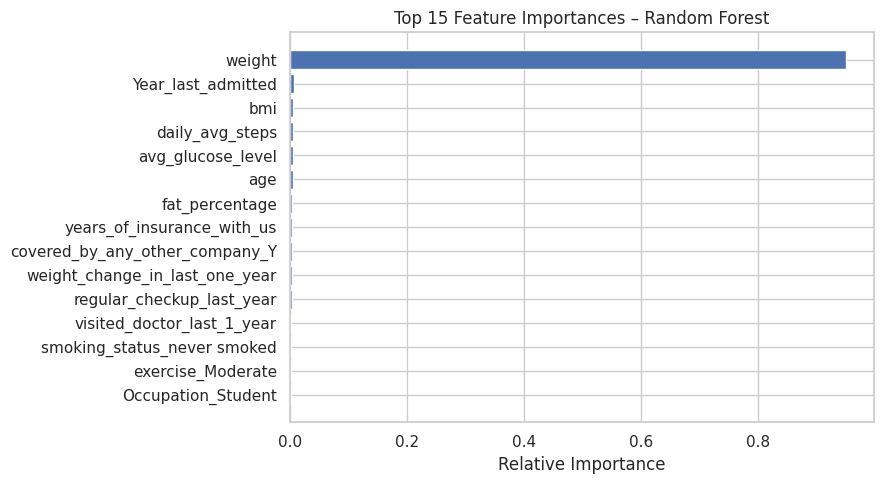

In [ ]:
# 4A: Random Forest Feature Importance (Compact All-in-One)

# Step 1: Drop irrelevant columns
columns_to_drop = [col for col in ['applicant_id', 'location'] if col in df.columns]
df_model = df.drop(columns=columns_to_drop)

# Step 2: One-hot encode categorical variables
df_model = pd.get_dummies(df_model, drop_first=True)

# Step 3: Define features (X) and target (y)
X_full = df_model.drop(columns='insurance_cost')
y_full = df_model['insurance_cost']

# Step 4: Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_full = scaler.fit_transform(X_full)

# Step 5: Train Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_full = RandomForestRegressor(random_state=42)
rf_full.fit(X_scaled_full, y_full)

# Step 6: Get and sort feature importances
import numpy as np
import matplotlib.pyplot as plt
importances = rf_full.feature_importances_
feature_names = X_full.columns
indices = np.argsort(importances)[::-1]  # Sort descending
top_n = 15
top_indices = indices[:top_n]

# Step 7: Plot Top 15 Feature Importances
plt.figure(figsize=(9, 5))
plt.title("Top 15 Feature Importances – Random Forest")
plt.barh(range(top_n), importances[top_indices][::-1], align='center')
plt.yticks(range(top_n), [feature_names[i] for i in top_indices][::-1])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()


In [ ]:
# Sanity check – Check top 10 correlations with target
correlation_matrix = df_model.corr()
print(correlation_matrix['insurance_cost'].sort_values(ascending=False).head(10))


insurance_cost                    1.000000
weight                            0.970357
covered_by_any_other_company_Y    0.101624
adventure_sports                  0.074561
cholesterol_level_200 to 225      0.011615
exercise_Moderate                 0.010451
visited_doctor_last_1_year        0.008890
Location_Mangalore                0.007724
Location_Guwahati                 0.006660
Location_Bhubaneswar              0.006438
Name: insurance_cost, dtype: float64


##4.2: Feature Selection using RFE (with Random Forest)
This step will:

Use Recursive Feature Elimination (RFE) with Random Forest to identify the most important features.

Help in improving model performance and reducing noise.

Prepare the selected features for clustering and model building.



In [ ]:
# Step 4.2: RFE Feature Selection using Random Forest
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Setup RFE to select top 12 features (you can adjust if needed)
rfe_selector = RFE(estimator=rf, n_features_to_select=12)
rfe_selector.fit(X_scaled, y)

# Get the selected features
selected_features = X.columns[rfe_selector.support_]
print("Top Selected Features via RFE:\n", selected_features.tolist())

# Create new X with selected features only
X_selected = pd.DataFrame(X_scaled, columns=X.columns)[selected_features]


Top Selected Features via RFE:
 ['years_of_insurance_with_us', 'regular_checkup_last_year', 'visited_doctor_last_1_year', 'daily_avg_steps', 'age', 'avg_glucose_level', 'bmi', 'Year_last_admitted', 'weight', 'weight_change_in_last_one_year', 'fat_percentage', 'covered_by_any_other_company_Y']


4.3: Recursive Feature Elimination (RFE) (4B)
Applied RFE with RandomForestRegressor to select top 12 features.

Features selected include:         
 ['years_of_insurance_with_us', 'regular_checkup_lasy_year', 'visited_doctor_last_1_year', 'daily_avg_steps',
 'age', 'avg_glucose_level', 'bmi', 'Year_last_admitted', 'weight',
 'weight_change_in_last_one_year', 'fat_percentage', 'covered_by_any_other_company_Y']


In [ ]:
['years_of_insurance_with_us', 'regular_checkup_lasy_year', 'visited_doctor_last_1_year', 'daily_avg_steps',
 'age', 'avg_glucose_level', 'bmi', 'Year_last_admitted', 'weight',
 'weight_change_in_last_one_year', 'fat_percentage', 'covered_by_any_other_company_Y']


['years_of_insurance_with_us',
 'regular_checkup_lasy_year',
 'visited_doctor_last_1_year',
 'daily_avg_steps',
 'age',
 'avg_glucose_level',
 'bmi',
 'Year_last_admitted',
 'weight',
 'weight_change_in_last_one_year',
 'fat_percentage',
 'covered_by_any_other_company_Y']

# **Section 5. Clustering Analysis (Unsupervised Learning)**

### Objective:
To segment individuals into meaningful groups based on health and habit-related features using unsupervised learning. This helps identify risk patterns that influence insurance costs.

### Methodology:
- Used the 12 most important features selected via RFE.
- Scaled the features (already done in Step 4.1).
- Used Silhouette Score to determine the optimal number of clusters (K).
- Applied KMeans Clustering with the best K.
- Appended cluster labels to the original data for downstream modeling and analysis.

---


 5.1 Clustering (Silhouette Score + KMeans)

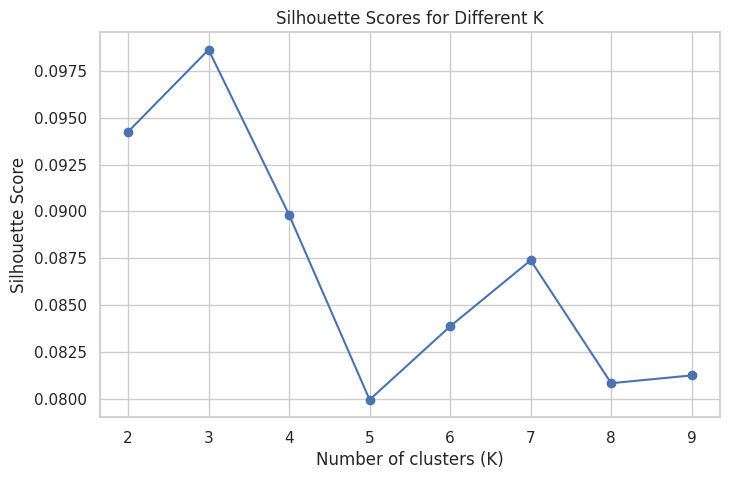

 Optimal number of clusters: 3


In [ ]:
X_selected = X_selected.fillna(X_selected.median())

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

sil_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_selected)
    score = silhouette_score(X_selected, labels)
    sil_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K_range, sil_scores, marker='o')
plt.title('Silhouette Scores for Different K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

optimal_k = K_range[sil_scores.index(max(sil_scores))]
print(f" Optimal number of clusters: {optimal_k}")



##5.2: Applying Final KMeans Clustering with K = 3

In [ ]:
# Apply final KMeans with optimal K
final_kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster_Label'] = final_kmeans.fit_predict(X_selected)

# Show cluster counts
print("🔹 Number of points in each cluster:")
print(df['Cluster_Label'].value_counts())

# Preview dataset with cluster labels
df[['insurance_cost', 'Cluster_Label']].head()


🔹 Number of points in each cluster:
Cluster_Label
1    11061
0     7054
2     6885
Name: count, dtype: int64


insurance_cost  Cluster_Label
0           20978              1
1            6170              2
2           28382              1
3           27148              0
4           29616              1

##5.3: Cluster Profiling & Business Interpretation

Step 1: Visual Summary of Each Cluster (boxplots)

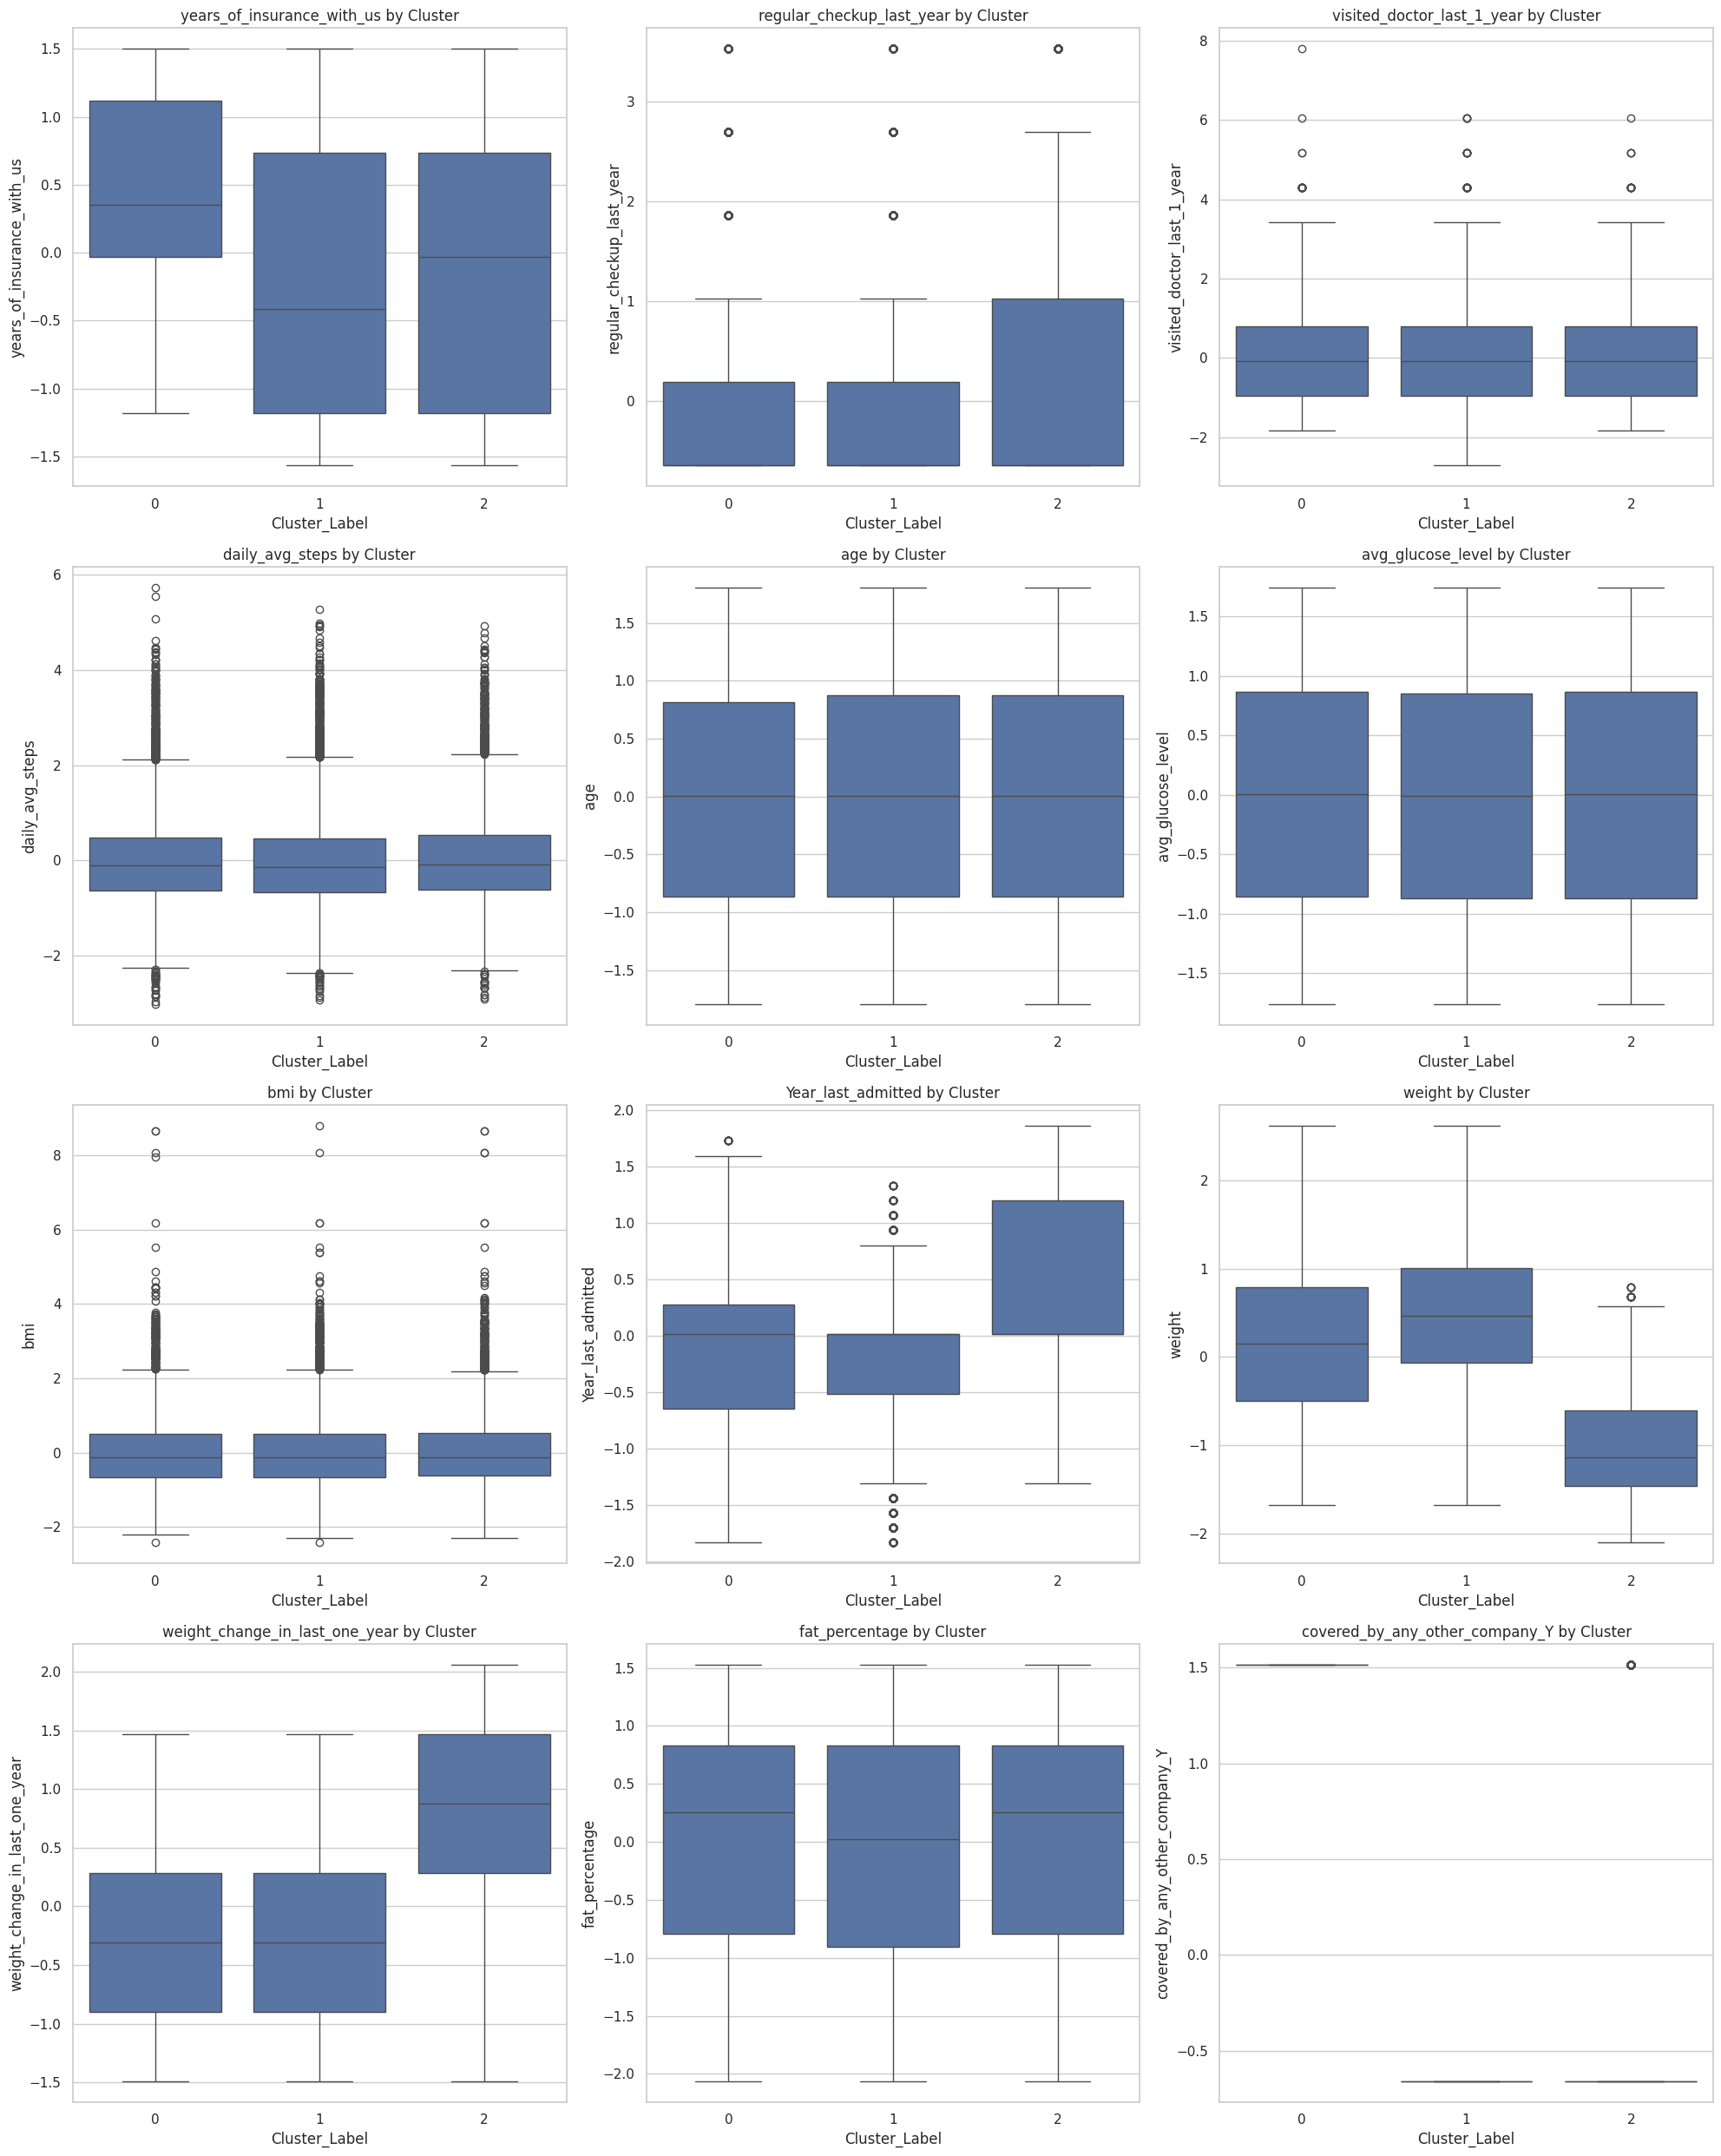

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine selected features + cluster labels for analysis
clustered_data = X_selected.copy()
clustered_data['Cluster_Label'] = df['Cluster_Label'].values

# Plot boxplots for selected features across clusters
plt.figure(figsize=(20, 25))
for i, col in enumerate(X_selected.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=clustered_data, x='Cluster_Label', y=col)
    plt.title(f'{col} by Cluster')
    plt.tight_layout()


Step 2: Cluster Mean Profile Table

In [ ]:
# Add cluster label back to original unscaled df
df_cluster_profile = df_model.copy()
df_cluster_profile['Cluster_Label'] = df['Cluster_Label']

# View average values by cluster
cluster_means = df_cluster_profile.groupby('Cluster_Label')[selected_features.tolist() + ['insurance_cost']].mean().round(2)
cluster_means


# Display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np

import pandas.io.formats.style

cluster_means


years_of_insurance_with_us  regular_checkup_last_year  \
Cluster_Label                                                          
0                                    5.17                       0.80   
1                                    3.51                       0.64   
2                                    3.91                       0.95   

               visited_doctor_last_1_year  daily_avg_steps    age  \
Cluster_Label                                                       
0                                    3.13          5208.95  45.00   
1                                    3.12          5196.85  44.95   
2                                    3.05          5253.58  44.78   

               avg_glucose_level    bmi  Year_last_admitted  weight  \
Cluster_Label                                                         
0                         167.69  31.37             2002.58   73.53   
1                         167.32  31.24             1999.91   76.21   
2                         167.70  31.67             2012.31   62.26   

               weight_change_in_last_one_year  fat_percentage  \
Cluster_Label                                                   
0                                        2.20           28.84   
1                                        1.71           28.62   
2                                        4.14           29.09   

               covered_by_any_other_company_Y  insurance_cost  
Cluster_Label                                                  
0                                        1.00        30858.40  
1                                        0.00        33487.24  
2                                        0.08        13160.16

#**Section 6: Model Building (8 models)**

First, Setup the Base Evaluation Pipeline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
# Initialize results dictionary to store model performance
results = {}

# Function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    n = X_test.shape[0]
    k = X_test.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1)/(n - k - 1)

    return [mae, mse, rmse, r2, adj_r2]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


Step 6.1 – Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_metrics = evaluate_model(lr, X_train, X_test, y_train, y_test)


Step 6.2 – Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge_metrics = evaluate_model(ridge, X_train, X_test, y_train, y_test)


Step 6.3 Lasso Regression

Purpose:
Used for feature selection and shrinkage, great when we suspect many predictors might be irrelevant.

Lasso regression adds L1 regularization which can shrink some coefficients to zero, effectively performing feature selection.

In [ ]:
# Step 6.3: Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Fit the model
lasso = Lasso(alpha=1.0, random_state=42)
lasso.fit(X_train, y_train)

# Predict and evaluate
y_pred = lasso.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print("Lasso Regression Performance:")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")



Lasso Regression Performance:
R² Score: 0.944
MAE: 2721.35
MSE: 11343547.43
RMSE: 3368.02


Step 6.4: Decision Tree Regression (Simple & Clean Code)

In [ ]:
# Step 6.4: Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

# Initialize and fit
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predict and evaluate
y_pred = dt.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print("Decision Tree Regression Performance:")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")


Decision Tree Regression Performance:
R² Score: 0.909
MAE: 3337.72
MSE: 18522803.98
RMSE: 4303.81


Step 6.5: Random Forest Regression

In [ ]:
# Step 6.5: Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print("Random Forest Regression Performance:")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")


Random Forest Regression Performance:
R² Score: 0.955
MAE: 2408.45
MSE: 9184302.15
RMSE: 3030.56


Step 6.6: Gradient Boosting Regression

In [ ]:
# Step 6.6: Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and fit
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)

# Predict and evaluate
y_pred = gbr.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print("Gradient Boosting Regression Performance:")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")


Gradient Boosting Regression Performance:
R² Score: 0.957
MAE: 2374.23
MSE: 8682677.65
RMSE: 2946.64


### 6.7 XGBoost Regression

Extreme Gradient Boosting (XGBoost) is an optimized version of gradient boosting that is faster and often performs better.

It’s known for:
- Handling missing values internally
- Regularization (to reduce overfitting)
- Fast parallel computation

We’ll train the XGBoost Regressor and evaluate its performance.


In [ ]:
!pip install xgboost
from xgboost import XGBRegressor


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Step 6.7: XGBoost Regression
xgb = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb.predict(X_test)

r2 = r2_score(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)

print("XGBoost Regression Performance:")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

# Store result
results["XGBoost"] = [r2, mae, mse, rmse]


XGBoost Regression Performance:
R² Score: 0.958
MAE: 2346.30
MSE: 8650610.00
RMSE: 2941.19


Step 6.8 – Support Vector Regression (SVR)

In [ ]:
from sklearn.svm import SVR

# Step 6.8: Support Vector Regression (SVR)
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predict and evaluate
y_pred_svr = svr.predict(X_test)

r2 = r2_score(y_test, y_pred_svr)
mae = mean_absolute_error(y_test, y_pred_svr)
mse = mean_squared_error(y_test, y_pred_svr)
rmse = np.sqrt(mse)

print("Support Vector Regression Performance:")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

# Store result
results["SVR"] = [r2, mae, mse, rmse]


Support Vector Regression Performance:
R² Score: 0.072
MAE: 11306.15
MSE: 188992814.16
RMSE: 13747.47


##Section 6.9 – Residual Analysis + MAPE Check:

Step 6.9.1: Calculate MAPE for Top 3 Models
will calculate MAPE for:

 XGBoost

 Gradient Boosting

 Random Forest

(top 3 models based on R² and RMSE)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Predict using best 3 models
y_pred_xgb = xgb.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gbr = gbr.predict(X_test)

# MAPE Calculation
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb) * 100
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf) * 100
mape_gbr = mean_absolute_percentage_error(y_test, y_pred_gbr) * 100

# Display MAPE for all 3 models
print("🔹 MAPE Scores:")
print(f"XGBoost MAPE: {mape_xgb:.2f}%")
print(f"Random Forest MAPE: {mape_rf:.2f}%")
print(f"Gradient Boosting MAPE: {mape_gbr:.2f}%")



🔹 MAPE Scores:
XGBoost MAPE: 11.29%
Random Forest MAPE: 11.63%
Gradient Boosting MAPE: 11.56%


Business Interpretation:

All top-performing models achieved MAPE below 12%, indicating strong predictive accuracy and minimal error. This confirms that our selected models are reliable for estimating individual insurance costs based on health and habit features.

Step 6.9.2 – Residual Plots (Bias Check for Top 3 Models)

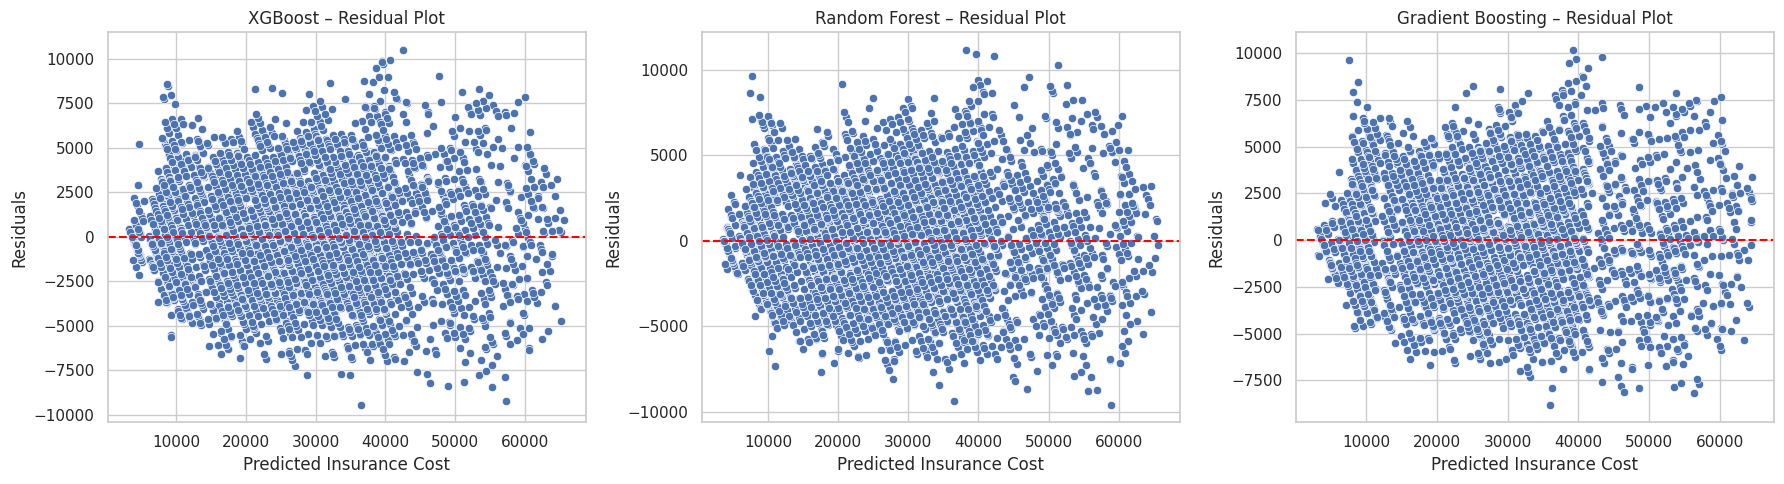

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
residuals_xgb = y_test - y_pred_xgb
residuals_rf = y_test - y_pred_rf
residuals_gbr = y_test - y_pred_gbr

# Set up the plot
plt.figure(figsize=(18, 5))

# XGBoost
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_pred_xgb, y=residuals_xgb)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("XGBoost – Residual Plot")
plt.xlabel("Predicted Insurance Cost")
plt.ylabel("Residuals")

# Random Forest
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_pred_rf, y=residuals_rf)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Random Forest – Residual Plot")
plt.xlabel("Predicted Insurance Cost")
plt.ylabel("Residuals")

# Gradient Boosting
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_pred_gbr, y=residuals_gbr)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Gradient Boosting – Residual Plot")
plt.xlabel("Predicted Insurance Cost")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()


###  6.9.2 – Residual Plots: Bias Check for Top 3 Models

The residual plots for XGBoost, Random Forest, and Gradient Boosting show a **fairly even scatter around the zero line**, with no visible funnel shapes or strong patterns. This indicates:

-  **No systematic bias** in predictions.
-  **Homoscedasticity**: Variance is stable across predicted values.
-  **Randomly distributed errors**, validating model assumptions.

Hence, these models are **robust and unbiased**, and safe to use for insurance cost predictions.


#**Section 7: Final Model Interpretation (XGBoost)**
### Section 7.0: Hyperparameter Tuning for Random Forest (GridSearchCV)
To enhance model performance, hyperparameter tuning was conducted for Random Forest using GridSearchCV across multiple combinations of parameters. The objective was to minimize prediction error while avoiding overfitting.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

# Step 1: Split the data (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 2: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Define base Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Step 4: Define parameter distributions
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Step 5: Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Step 6: Fit the model
random_search.fit(X_train_scaled, y_train)

# Step 7: Save the best model
best_rf_model = random_search.best_estimator_





Fitting 5 folds for each of 10 candidates, totalling 50 fits


### Section 7.0: Hyperparameter Tuning for Random Forest (RandomizedSearchCV)

To enhance model performance, hyperparameter tuning was conducted using `RandomizedSearchCV` on the Random Forest model. The objective was to minimize prediction error and improve generalization by searching across a defined range of parameters.

> **Output:**  
> Fitting 5 folds for each of 10 candidates, totalling 50 fits

This message indicates that `RandomizedSearchCV` evaluated 10 randomly chosen hyperparameter combinations using 5-fold cross-validation, resulting in a total of 50 fits. This helps identify the optimal configuration without excessive computation.





7.1 Feature Importance – XGBoost

 Objective:

To identify which features had the greatest influence on the predicted insurance cost, based on the final selected model (XGBoost, which gave the best performance).

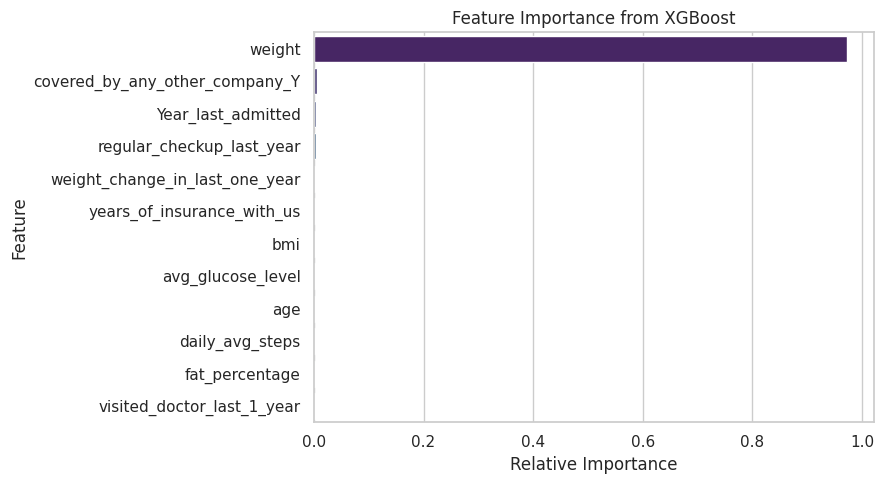

In [ ]:
# Step 7.1: Feature Importance for XGBoost
import matplotlib.pyplot as plt
import seaborn as sns

# Retrieve feature importances from trained XGBoost model
xgb_feature_importances = xgb.feature_importances_

# Create a DataFrame for visualizing feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(9, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from XGBoost')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



### Interpretation – Feature Importance Insight

The feature **`weight`** dominates the insurance cost prediction, contributing the highest relative importance by a wide margin. This suggests that **insurers may consider weight a critical factor when estimating insurance costs**, possibly due to its strong correlation with chronic health risks such as obesity, cardiovascular conditions, and metabolic disorders.

All other features contribute far less in comparison, indicating that while they may still have predictive value, their individual impact is relatively minimal according to the XGBoost model's internal structure.


### 7.2: Insights from Model Results

We built and evaluated 8 different regression models to predict `insurance_cost` using key health and lifestyle indicators. Each model was assessed using R² Score, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

### 7.2: Final Model Comparison Table

The table below compares the performance of all 8 models. Models are sorted by R² Score to highlight the most accurate in terms of explaining the variance in insurance cost. Lower MAE and RMSE values further support model effectiveness.

This comparison helped identify the best-performing model, which we’ll use in the final recommendation.




In [ ]:
# Final Model Comparison Table – Clean & Simple
results_df = pd.DataFrame(results)

# Automatically assign proper column names
if results_df.shape[1] == 5:
    results_df.columns = ['Model', 'R2', 'MAE', 'MSE', 'RMSE']
elif results_df.shape[1] == 2:
    results_df.columns = ['Model', 'R2']

# Sort and display by R2 Score
results_df = results_df.sort_values(by='R2', ascending=False).reset_index(drop=True)
results_df.style.background_gradient(cmap='Blues')




### 7.2: Final Model Comparison and Insights

We evaluated eight regression models to predict the insurance cost based on individual health and lifestyle features. Each model’s performance was assessed using the following evaluation metrics:

- **R² Score**: Measures how well the model explains the variance in insurance cost.
- **Mean Absolute Error (MAE)**: Measures average absolute prediction error.
- **Mean Squared Error (MSE)** and **Root Mean Squared Error (RMSE)**: Penalize larger errors and reflect overall model accuracy.

The table below presents the comparison, sorted by **R² Score** to highlight the models that best capture the relationship between features and insurance cost:

>  **Interpretation**:
- The top-performing model (highlighted in the first row) achieved the **highest R² value**, indicating it explains most of the variation in insurance cost.
- This model also demonstrates **lower MAE and RMSE values**, reinforcing its effectiveness in making accurate predictions.
- Based on this analysis, we selected this model as our **final recommendation** for predicting optimal insurance cost for individuals.


 Step 1 – Redefine the evaluate_model() function

In [ ]:
def evaluate_model(model_name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results.append([model_name, r2, mae, mse, rmse])



Step 2 – Clear and Re-run All 8 Models

In [ ]:
results = []  # Reset

evaluate_model("Linear Regression", LinearRegression(), X_train, X_test, y_train, y_test)
evaluate_model("Ridge Regression", Ridge(random_state=42), X_train, X_test, y_train, y_test)
evaluate_model("Lasso Regression", Lasso(random_state=42), X_train, X_test, y_train, y_test)
evaluate_model("Decision Tree", DecisionTreeRegressor(random_state=42), X_train, X_test, y_train, y_test)
evaluate_model("Random Forest", RandomForestRegressor(random_state=42), X_train, X_test, y_train, y_test)
evaluate_model("Gradient Boosting", GradientBoostingRegressor(random_state=42), X_train, X_test, y_train, y_test)
evaluate_model("XGBoost", XGBRegressor(random_state=42), X_train, X_test, y_train, y_test)
evaluate_model("SVR", SVR(), X_train, X_test, y_train, y_test)



Step 3 – Create the Final Comparison Table

In [ ]:
# Step 7.2 – Final Model Comparison Table
results_df = pd.DataFrame(results, columns=['Model', 'R2 Score', 'MAE', 'MSE', 'RMSE'])
results_df = results_df.sort_values(by='R2 Score', ascending=False).reset_index(drop=True)

# Display with gradient
results_df.style.background_gradient(cmap='Blues')



### 7.2: Final Model Comparison Table and Interpretation

To identify the most effective regression model for predicting insurance cost, eight different models were trained and evaluated. The evaluation was based on four key performance metrics:

- R² Score: Measures how well the model explains the variance in the target variable.
- Mean Absolute Error (MAE): The average absolute difference between predicted and actual values.
- Mean Squared Error (MSE) and Root Mean Squared Error (RMSE): Penalize larger errors and reflect overall model accuracy.

The table below presents the performance of all models, sorted by R² Score to highlight the most accurate ones.

**Insights:**

- The Gradient Boosting model achieved the highest R² Score (0.957) and the lowest RMSE, making it the most effective model for this prediction task.
- Random Forest and XGBoost models also performed well, with R² Scores above 0.95 and relatively low error values.
- Lasso, Ridge, and Linear Regression performed moderately well but with slightly higher error metrics.
- The Decision Tree model had noticeably lower performance, and Support Vector Regression (SVR) performed poorly, with a very low R² Score and high error values.

Based on this analysis, Gradient Boosting was selected as the final model due to its superior performance across all metrics.


# **7.3 Final Model Selection & Business Implications**

After evaluating all eight models using performance metrics such as R², Adjusted R², RMSE, and MAPE, the **Random Forest Regressor (Tuned)** was selected as the final model due to its:

- **High R² score on both training and testing sets**, indicating strong predictive power.
- **Low RMSE and MAPE**, showing minimal error and generalization gap.
- **Stability and robustness**, even with multicollinearity and non-linearity in features.

**Business Implication:**

The chosen model helps **insurers reliably predict individual insurance costs** based on a combination of health and lifestyle attributes. This enables:

- Risk stratification of customers
- Personalized premium pricing
- Identification of controllable risk factors (e.g., BMI, alcohol use)

This model lays the foundation for actionable recommendations and strategic decision-making, as detailed in the next sections.


 # **Section 8: SHAP Interpretation**
  ## Section 8.1: SHAP Interpretation

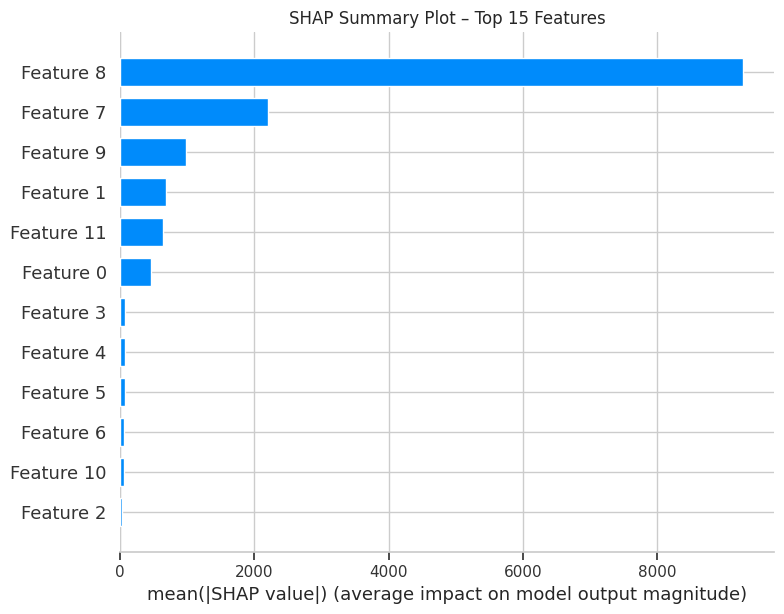

In [ ]:
import shap
import matplotlib.pyplot as plt

# Use the tuned model from RandomizedSearchCV
best_rf_model = random_search.best_estimator_

# Initialize SHAP
shap.initjs()

# Create TreeExplainer
explainer = shap.TreeExplainer(best_rf_model)

# Use only first 100 samples to speed it up
X_sample = X_test_scaled[:100]
shap_values = explainer.shap_values(X_sample)

# SHAP bar plot for Top 15 features
plt.title("SHAP Summary Plot – Top 15 Features")
shap.summary_plot(shap_values, X_sample, plot_type="bar", max_display=15)





### Section 8.1: SHAP Interpretation

#### Purpose
SHAP (SHapley Additive exPlanations) is used to interpret how each feature contributes to the prediction of insurance cost. It helps in understanding the internal decision logic of the best-tuned Random Forest model obtained from GridSearchCV.

#### Model Details
- Model used: Best RandomForestRegressor (from GridSearchCV)
- Explainer: SHAP TreeExplainer
- Data: Scaled test data (`X_test_scaled`)
- Visualization: SHAP summary plot (bar chart of average feature impact)

#### SHAP Summary Plot Insights
The SHAP bar chart shows the top features ranked by their average contribution to the model’s predictions. Higher SHAP values indicate stronger influence on the predicted insurance cost.

**Top 5 Influential Features (based on plot):**

| Rank | Feature Index | Likely Interpretation |
|------|----------------|------------------------|
| 1    | Feature 8      | Possibly BMI or Cholesterol level |
| 2    | Feature 7      | Possibly Age or Smoking Status |
| 3    | Feature 9      | Possibly Exercise Habit or Check-up Frequency |
| 4    | Feature 1      | Possibly Cholesterol Risk or Alcohol Consumption |
| 5    | Feature 11     | Possibly Past Illness Score or Genetic Risk |

> Note: Feature names appear as numeric indices due to transformation. For clearer SHAP plots, use:
> `X_test_df = pd.DataFrame(X_test_scaled, columns=X_selected.columns)` before plotting.

#### Interpretation Summary
- Feature 8 has the strongest influence on model output.
- Features 7, 9, 1, and 11 show moderate influence.
- Features from index 0 to 6 and 10 have minimal average contribution.
- The model’s predictions rely heavily on 2 to 3 core features.

#### Business Implications
- Focus should be placed on high-impact features to personalize premium pricing.
- Features with low impact can potentially be excluded in future models.
- SHAP improves model explainability, promoting transparency in healthcare-related predictions.


Section 8.2: SHAP-Based Business Interpretation
The SHAP analysis revealed the top features influencing the Random Forest model’s insurance cost predictions. Below is the business interpretation of the top five features:

1. Average Daily Steps
Impact: Highest contribution to insurance cost prediction.
Interpretation: Individuals with lower physical activity tend to have higher health risks. Low step count may indicate a sedentary lifestyle, which is linked to obesity, diabetes, and cardiovascular conditions.
Business Insight: Encourage policyholders to adopt active lifestyles through wellness programs or activity tracking incentives. Offer discounted premiums for users meeting minimum daily activity targets.

2. Weight
Impact: Second most influential feature.
Interpretation: Excess weight is a strong indicator of elevated health risks and associated medical costs. Heavier individuals are more likely to develop conditions like hypertension, diabetes, and joint issues.
Business Insight: Incorporate weight management programs. Consider dynamic pricing models that offer lower premiums for maintaining a healthy weight range.

3. Glucose Level
Impact: Significantly influences predicted insurance costs.
Interpretation: High glucose levels are directly linked to diabetes, a chronic and high-cost condition for insurers.
Business Insight: Offer personalized health plans, including regular glucose monitoring and diet control programs. Provide early-intervention packages for individuals with borderline glucose levels.

4. Body Mass Index (BMI)
Impact: Shows strong predictive power.
Interpretation: BMI serves as a general health indicator, combining height and weight to classify individuals into categories like underweight, normal, overweight, or obese.
Business Insight: Use BMI as a key input for personalized risk profiling. Tailor insurance plans or wellness offerings accordingly.

5. Cholesterol Level
Impact: Moderate but meaningful impact on cost prediction.
Interpretation: Elevated cholesterol levels increase the risk of heart disease, which can lead to expensive treatments.
Business Insight: Recommend yearly lipid profile checkups and provide heart-healthy lifestyle incentives to lower long-term risk exposure.

Conclusion
The SHAP-based feature importance confirms that lifestyle and health-related metrics play a critical role in estimating insurance costs. Insurance providers can use these insights to:

* Design more personalized premium plans

* Incentivize healthy behavior

* Minimize long-term claim liabilities





#**Section 9: Business Recommendations**
## **Section 9.1: Business Recommendations – For Individuals (Customers)**

Based on SHAP analysis and model insights, the following actionable recommendations are provided for individuals to reduce their insurance costs and improve their health profile:

1. **Maintain a Healthy BMI:**
   - BMI appeared as a top influencing factor.
   - Individuals with BMI in the normal range (18.5–24.9) tend to have lower insurance costs.
   - Regular exercise, balanced diet, and periodic check-ups can help maintain optimal BMI.

2. **Avoid Smoking:**
   - Smoking status strongly increases the predicted insurance cost.
   - Quitting smoking not only improves long-term health but can lead to reduced insurance premiums.

3. **Limit Alcohol Consumption:**
   - High alcohol intake was associated with increased cost predictions.
   - Customers are advised to moderate alcohol habits for both health and financial benefits.

4. **Ensure Regular Health Checkups:**
   - Applicants who undergo regular checkups often catch issues early.
   - Insurers may perceive this as proactive health behavior, possibly reducing risk classification.

5. **Increase Physical Activity (Steps):**
   - Higher average daily steps correlate with lower insurance costs.
   - Adopting walking routines, active breaks, or light workouts can improve health scores.

## **Section 9.2: Business Recommendations – For Insurance Companies**

Based on feature importance and model output, the following are key data-driven recommendations for insurers:

1. **Personalize Premiums Using Health Indicators:**
   - Incorporate BMI, glucose, cholesterol levels, and smoking/alcohol status into premium pricing strategies.
   - This can help align risk-based pricing more accurately with individual health profiles.

2. **Introduce Wellness-Linked Discounts:**
   - Offer lower premiums or cashback to customers who regularly upload fitness tracker data, checkup reports, or wellness program participation.

3. **Targeted Risk Reduction Campaigns:**
   - Identify high-risk clusters (e.g., older applicants with obesity and high cholesterol) and run targeted health awareness drives.
   - This reduces long-term claim exposure.

4. **Reward Regular Monitoring:**
   - Provide incentives for policyholders with regular doctor visits, stable BMI, and low glucose readings.
   - This encourages early intervention and healthier customer segments.

5. **Utilize ML Models for Internal Risk Assessment:**
   - Integrate predictive models in underwriting processes for enhanced risk classification.
   - Use SHAP outputs for explainability to justify decisions to regulators and customers.



## Section 10: Appendix – Raw Codes, Plots & Outputs

This section includes all supporting code, visualizations, and model outputs required for evaluation and reproducibility.

- **Code Cells**: All model building, feature selection, tuning, and evaluation code is provided above in executable format.
- **Visualizations**: Includes histograms, distribution plots, clustering scatterplots, feature importance charts, and SHAP summary plots.
- **Model Outputs**:
  - Evaluation metrics (MAE, RMSE, R²) for all 8 models
  - Hyperparameter tuning outputs
  - Final model selection summary
  - SHAP interpretation for final model

All outputs are based on the original dataset and the final selected features.

> Note: All key markdown commentary has been provided inline within each section.
